In [1]:
#import required libraries
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing dataset
cars = pd.read_csv('Dataset_Cars.csv')
cars.head()


name    year  selling_price  \
0                             Maruti Swift Dzire VDI  2014.0       450000.0   
1                       Skoda Rapid 1.5 TDI Ambition  2014.0       370000.0   
2  Honda City 2017-2020 EXi,2006,158000,140000,Pe...     NaN            NaN   
3                          Hyundai i20 Sportz Diesel  2010.0       225000.0   
4  Maruti Swift VXI BSIII,2007,130000,120000,Petr...     NaN            NaN   

   km_driven    fuel seller_type transmission         owner     mileage  \
0   145500.0  Diesel  Individual       Manual   First Owner   23.4 kmpl   
1   120000.0  Diesel  Individual       Manual  Second Owner  21.14 kmpl   
2        NaN     NaN         NaN          NaN           NaN         NaN   
3   127000.0  Diesel  Individual       Manual   First Owner   23.0 kmpl   
4        NaN     NaN         NaN          NaN           NaN         NaN   

    engine   max_power                    torque  seats  
0  1248 CC      74 bhp            190Nm@ 2000rpm    5.0  
1  1498 CC  103.52 bhp       250Nm@ 1500-2500rpm    5.0  
2      NaN         NaN                       NaN    NaN  
3  1396 CC      90 bhp  22.4 kgm at 1750-2750rpm    5.0  
4      NaN         NaN                       NaN    NaN

## Handling null fields

In [3]:
import csv 
carsNaN= cars.loc[cars[(cars.isnull().sum(axis=1) >= 6)].index]

for line in csv.reader(carsNaN["name"], skipinitialspace=True):    
    carsNaN.append(line)
carsNaN1 = carsNaN['name'].str.split(',',15 , expand=True)    
carsNaN1['11'] = carsNaN1[carsNaN1.columns[11:]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)

carsNaN1 = carsNaN1.drop(carsNaN1.columns[[11, 12, 13,14]], axis=1) 
 
carsNaN1['12']=carsNaN1['11'].str.extract('.*(\d{1})', expand = False)

carsNaN1['11'] = carsNaN1.apply(lambda x: x['11'][:-3], axis = 1)
display(carsNaN1)
display(cars)

0     1       2       3       4           5  \
2         Honda City 2017-2020 EXi  2006  158000  140000  Petrol  Individual   
4           Maruti Swift VXI BSIII  2007  130000  120000  Petrol  Individual   
6     Maruti Wagon R LXI DUO BSIII  2007   96000  175000     LPG  Individual   
226         Hyundai i20 1.2 Sportz  2012  275000   93000  Petrol  Individual   
242             Hyundai Accent GLE  2007   80000  120000  Petrol  Individual   
...                            ...   ...     ...     ...     ...         ...   
8076      Maruti Wagon R LXI BSIII  2006  150000   50000  Petrol  Individual   
8079                Tata Indigo LS  2007   90177  129000  Diesel  Individual   
8082  Ford Fiesta 1.4 Duratorq EXI  2007  125000  110000  Diesel  Individual   
8104     Honda City 2017-2020 VTEC  2006  160000   70000  Petrol  Individual   
8124         Hyundai Verna CRDi SX  2007  135000  119000  Diesel  Individual   

           6                     7           8        9        10  \
2     Manual           Third Owner   17.7 kmpl  1497 CC    78 bhp   
4     Manual           First Owner   16.1 kmpl  1298 CC  88.2 bhp   
6     Manual           First Owner  17.3 km/kg  1061 CC  57.5 bhp   
226   Manual          Second Owner   17.0 kmpl  1197 CC    80 bhp   
242   Manual          Second Owner   13.2 kmpl  1495 CC    94 bhp   
...      ...                   ...         ...      ...       ...   
8076  Manual           Third Owner   14.0 kmpl  1061 CC    64 bhp   
8079  Manual           Third Owner   17.0 kmpl  1405 CC    70 bhp   
8082  Manual           Third Owner   17.8 kmpl  1399 CC    68 bhp   
8104  Manual          Second Owner   16.9 kmpl  1497 CC   100 bhp   
8124  Manual  Fourth & Above Owner   16.8 kmpl  1493 CC   110 bhp   

                              11 12  
2         "12.7@ 2,700(kgm@ rpm)  5  
4         "11.5@ 4,500(kgm@ rpm)  5  
6          "7.8@ 4,500(kgm@ rpm)  5  
226       "11.4 kgm at 4,000 rpm  5  
242       "12.5@ 3,500(kgm@ rpm)  5  
...                          ... ..  
8076       "8.6@ 3,500(kgm@ rpm)  5  
8079      "13.5@ 2,500(kgm@ rpm)  5  
8082      "16.3@ 2,000(kgm@ rpm)  5  
8104      "13.5@ 4,800(kgm@ rpm)  5  
8124  "24@ 1,900-2,750(kgm@ rpm)  5  

[341 rows x 13 columns]

name    year  \
0                                Maruti Swift Dzire VDI  2014.0   
1                          Skoda Rapid 1.5 TDI Ambition  2014.0   
2     Honda City 2017-2020 EXi,2006,158000,140000,Pe...     NaN   
3                             Hyundai i20 Sportz Diesel  2010.0   
4     Maruti Swift VXI BSIII,2007,130000,120000,Petr...     NaN   
...                                                 ...     ...   
8123                                  Hyundai i20 Magna  2013.0   
8124  Hyundai Verna CRDi SX,2007,135000,119000,Diese...     NaN   
8125                             Maruti Swift Dzire ZDi  2009.0   
8126                                    Tata Indigo CR4  2013.0   
8127                                    Tata Indigo CR4  2013.0   

      selling_price  km_driven    fuel seller_type transmission         owner  \
0          450000.0   145500.0  Diesel  Individual       Manual   First Owner   
1          370000.0   120000.0  Diesel  Individual       Manual  Second Owner   
2               NaN        NaN     NaN         NaN          NaN           NaN   
3          225000.0   127000.0  Diesel  Individual       Manual   First Owner   
4               NaN        NaN     NaN         NaN          NaN           NaN   
...             ...        ...     ...         ...          ...           ...   
8123       320000.0   110000.0  Petrol  Individual       Manual   First Owner   
8124            NaN        NaN     NaN         NaN          NaN           NaN   
8125       382000.0   120000.0  Diesel  Individual       Manual   First Owner   
8126       290000.0    25000.0  Diesel  Individual       Manual   First Owner   
8127       290000.0    25000.0  Diesel  Individual       Manual   First Owner   

         mileage   engine   max_power                    torque  seats  
0      23.4 kmpl  1248 CC      74 bhp            190Nm@ 2000rpm    5.0  
1     21.14 kmpl  1498 CC  103.52 bhp       250Nm@ 1500-2500rpm    5.0  
2            NaN      NaN         NaN                       NaN    NaN  
3      23.0 kmpl  1396 CC      90 bhp  22.4 kgm at 1750-2750rpm    5.0  
4            NaN      NaN         NaN                       NaN    NaN  
...          ...      ...         ...                       ...    ...  
8123   18.5 kmpl  1197 CC   82.85 bhp          113.7Nm@ 4000rpm    5.0  
8124         NaN      NaN         NaN                       NaN    NaN  
8125   19.3 kmpl  1248 CC    73.9 bhp            190Nm@ 2000rpm    5.0  
8126  23.57 kmpl  1396 CC      70 bhp       140Nm@ 1800-3000rpm    5.0  
8127  23.57 kmpl  1396 CC      70 bhp       140Nm@ 1800-3000rpm    5.0  

[8128 rows x 13 columns]

In [4]:
import pandas as pd
pd.concat([cars,carsNaN1]).reset_index(drop=True)
carsNaN1.reset_index() 
carsNaN1 = carsNaN1.rename(columns={"11": "name"})
carsNaN1

0     1       2       3       4           5  \
2         Honda City 2017-2020 EXi  2006  158000  140000  Petrol  Individual   
4           Maruti Swift VXI BSIII  2007  130000  120000  Petrol  Individual   
6     Maruti Wagon R LXI DUO BSIII  2007   96000  175000     LPG  Individual   
226         Hyundai i20 1.2 Sportz  2012  275000   93000  Petrol  Individual   
242             Hyundai Accent GLE  2007   80000  120000  Petrol  Individual   
...                            ...   ...     ...     ...     ...         ...   
8076      Maruti Wagon R LXI BSIII  2006  150000   50000  Petrol  Individual   
8079                Tata Indigo LS  2007   90177  129000  Diesel  Individual   
8082  Ford Fiesta 1.4 Duratorq EXI  2007  125000  110000  Diesel  Individual   
8104     Honda City 2017-2020 VTEC  2006  160000   70000  Petrol  Individual   
8124         Hyundai Verna CRDi SX  2007  135000  119000  Diesel  Individual   

           6                     7           8        9        10  \
2     Manual           Third Owner   17.7 kmpl  1497 CC    78 bhp   
4     Manual           First Owner   16.1 kmpl  1298 CC  88.2 bhp   
6     Manual           First Owner  17.3 km/kg  1061 CC  57.5 bhp   
226   Manual          Second Owner   17.0 kmpl  1197 CC    80 bhp   
242   Manual          Second Owner   13.2 kmpl  1495 CC    94 bhp   
...      ...                   ...         ...      ...       ...   
8076  Manual           Third Owner   14.0 kmpl  1061 CC    64 bhp   
8079  Manual           Third Owner   17.0 kmpl  1405 CC    70 bhp   
8082  Manual           Third Owner   17.8 kmpl  1399 CC    68 bhp   
8104  Manual          Second Owner   16.9 kmpl  1497 CC   100 bhp   
8124  Manual  Fourth & Above Owner   16.8 kmpl  1493 CC   110 bhp   

                            name 12  
2         "12.7@ 2,700(kgm@ rpm)  5  
4         "11.5@ 4,500(kgm@ rpm)  5  
6          "7.8@ 4,500(kgm@ rpm)  5  
226       "11.4 kgm at 4,000 rpm  5  
242       "12.5@ 3,500(kgm@ rpm)  5  
...                          ... ..  
8076       "8.6@ 3,500(kgm@ rpm)  5  
8079      "13.5@ 2,500(kgm@ rpm)  5  
8082      "16.3@ 2,000(kgm@ rpm)  5  
8104      "13.5@ 4,800(kgm@ rpm)  5  
8124  "24@ 1,900-2,750(kgm@ rpm)  5  

[341 rows x 13 columns]

In [5]:
from pandas import DataFrame
C=carsNaN1.values.tolist()
C
colNames=['name','year','selling_price','km_driven','fuel','seller_type','transmission','owner','mileage','engine','max_power','torque','seats']
df = DataFrame(C,columns=colNames)
df

name  year selling_price km_driven    fuel  \
0        Honda City 2017-2020 EXi  2006        158000    140000  Petrol   
1          Maruti Swift VXI BSIII  2007        130000    120000  Petrol   
2    Maruti Wagon R LXI DUO BSIII  2007         96000    175000     LPG   
3          Hyundai i20 1.2 Sportz  2012        275000     93000  Petrol   
4              Hyundai Accent GLE  2007         80000    120000  Petrol   
..                            ...   ...           ...       ...     ...   
336      Maruti Wagon R LXI BSIII  2006        150000     50000  Petrol   
337                Tata Indigo LS  2007         90177    129000  Diesel   
338  Ford Fiesta 1.4 Duratorq EXI  2007        125000    110000  Diesel   
339     Honda City 2017-2020 VTEC  2006        160000     70000  Petrol   
340         Hyundai Verna CRDi SX  2007        135000    119000  Diesel   

    seller_type transmission                 owner     mileage   engine  \
0    Individual       Manual           Third Owner   17.7 kmpl  1497 CC   
1    Individual       Manual           First Owner   16.1 kmpl  1298 CC   
2    Individual       Manual           First Owner  17.3 km/kg  1061 CC   
3    Individual       Manual          Second Owner   17.0 kmpl  1197 CC   
4    Individual       Manual          Second Owner   13.2 kmpl  1495 CC   
..          ...          ...                   ...         ...      ...   
336  Individual       Manual           Third Owner   14.0 kmpl  1061 CC   
337  Individual       Manual           Third Owner   17.0 kmpl  1405 CC   
338  Individual       Manual           Third Owner   17.8 kmpl  1399 CC   
339  Individual       Manual          Second Owner   16.9 kmpl  1497 CC   
340  Individual       Manual  Fourth & Above Owner   16.8 kmpl  1493 CC   

    max_power                      torque seats  
0      78 bhp      "12.7@ 2,700(kgm@ rpm)     5  
1    88.2 bhp      "11.5@ 4,500(kgm@ rpm)     5  
2    57.5 bhp       "7.8@ 4,500(kgm@ rpm)     5  
3      80 bhp      "11.4 kgm at 4,000 rpm     5  
4      94 bhp      "12.5@ 3,500(kgm@ rpm)     5  
..        ...                         ...   ...  
336    64 bhp       "8.6@ 3,500(kgm@ rpm)     5  
337    70 bhp      "13.5@ 2,500(kgm@ rpm)     5  
338    68 bhp      "16.3@ 2,000(kgm@ rpm)     5  
339   100 bhp      "13.5@ 4,800(kgm@ rpm)     5  
340   110 bhp  "24@ 1,900-2,750(kgm@ rpm)     5  

[341 rows x 13 columns]

In [6]:
ind=((cars.loc[cars[(cars.isnull().sum(axis=1) >= 6)].index]).index )
display(ind)

#display(cars)
cars=cars.drop(ind).reindex()
 
#display(df)
cars.append(df)
#display(cars)
C=cars.values.tolist()
D=df.values.tolist()
cars2 = DataFrame(C,columns=colNames)

cars3 = DataFrame(D,columns=colNames)

cars2=cars2.append(cars3).reindex()
display(cars2)


Int64Index([   2,    4,    6,  226,  242,  250,  251,  280,  301,  324,
            ...
            7995, 8001, 8020, 8043, 8061, 8076, 8079, 8082, 8104, 8124],
           dtype='int64', length=341)

name    year selling_price km_driven    fuel  \
0           Maruti Swift Dzire VDI  2014.0      450000.0  145500.0  Diesel   
1     Skoda Rapid 1.5 TDI Ambition  2014.0      370000.0  120000.0  Diesel   
2        Hyundai i20 Sportz Diesel  2010.0      225000.0  127000.0  Diesel   
3    Hyundai Xcent 1.2 VTVT E Plus  2017.0      440000.0   45000.0  Petrol   
4               Maruti 800 DX BSII  2001.0       45000.0    5000.0  Petrol   
..                             ...     ...           ...       ...     ...   
336       Maruti Wagon R LXI BSIII    2006        150000     50000  Petrol   
337                 Tata Indigo LS    2007         90177    129000  Diesel   
338   Ford Fiesta 1.4 Duratorq EXI    2007        125000    110000  Diesel   
339      Honda City 2017-2020 VTEC    2006        160000     70000  Petrol   
340          Hyundai Verna CRDi SX    2007        135000    119000  Diesel   

    seller_type transmission                 owner     mileage   engine  \
0    Individual       Manual           First Owner   23.4 kmpl  1248 CC   
1    Individual       Manual          Second Owner  21.14 kmpl  1498 CC   
2    Individual       Manual           First Owner   23.0 kmpl  1396 CC   
3    Individual       Manual           First Owner  20.14 kmpl  1197 CC   
4    Individual       Manual          Second Owner   16.1 kmpl   796 CC   
..          ...          ...                   ...         ...      ...   
336  Individual       Manual           Third Owner   14.0 kmpl  1061 CC   
337  Individual       Manual           Third Owner   17.0 kmpl  1405 CC   
338  Individual       Manual           Third Owner   17.8 kmpl  1399 CC   
339  Individual       Manual          Second Owner   16.9 kmpl  1497 CC   
340  Individual       Manual  Fourth & Above Owner   16.8 kmpl  1493 CC   

      max_power                      torque seats  
0        74 bhp              190Nm@ 2000rpm   5.0  
1    103.52 bhp         250Nm@ 1500-2500rpm   5.0  
2        90 bhp    22.4 kgm at 1750-2750rpm   5.0  
3     81.86 bhp           113.75nm@ 4000rpm   5.0  
4        37 bhp               59Nm@ 2500rpm   4.0  
..          ...                         ...   ...  
336      64 bhp       "8.6@ 3,500(kgm@ rpm)     5  
337      70 bhp      "13.5@ 2,500(kgm@ rpm)     5  
338      68 bhp      "16.3@ 2,000(kgm@ rpm)     5  
339     100 bhp      "13.5@ 4,800(kgm@ rpm)     5  
340     110 bhp  "24@ 1,900-2,750(kgm@ rpm)     5  

[8128 rows x 13 columns]

In [7]:
cars2

name    year selling_price km_driven    fuel  \
0           Maruti Swift Dzire VDI  2014.0      450000.0  145500.0  Diesel   
1     Skoda Rapid 1.5 TDI Ambition  2014.0      370000.0  120000.0  Diesel   
2        Hyundai i20 Sportz Diesel  2010.0      225000.0  127000.0  Diesel   
3    Hyundai Xcent 1.2 VTVT E Plus  2017.0      440000.0   45000.0  Petrol   
4               Maruti 800 DX BSII  2001.0       45000.0    5000.0  Petrol   
..                             ...     ...           ...       ...     ...   
336       Maruti Wagon R LXI BSIII    2006        150000     50000  Petrol   
337                 Tata Indigo LS    2007         90177    129000  Diesel   
338   Ford Fiesta 1.4 Duratorq EXI    2007        125000    110000  Diesel   
339      Honda City 2017-2020 VTEC    2006        160000     70000  Petrol   
340          Hyundai Verna CRDi SX    2007        135000    119000  Diesel   

    seller_type transmission                 owner     mileage   engine  \
0    Individual       Manual           First Owner   23.4 kmpl  1248 CC   
1    Individual       Manual          Second Owner  21.14 kmpl  1498 CC   
2    Individual       Manual           First Owner   23.0 kmpl  1396 CC   
3    Individual       Manual           First Owner  20.14 kmpl  1197 CC   
4    Individual       Manual          Second Owner   16.1 kmpl   796 CC   
..          ...          ...                   ...         ...      ...   
336  Individual       Manual           Third Owner   14.0 kmpl  1061 CC   
337  Individual       Manual           Third Owner   17.0 kmpl  1405 CC   
338  Individual       Manual           Third Owner   17.8 kmpl  1399 CC   
339  Individual       Manual          Second Owner   16.9 kmpl  1497 CC   
340  Individual       Manual  Fourth & Above Owner   16.8 kmpl  1493 CC   

      max_power                      torque seats  
0        74 bhp              190Nm@ 2000rpm   5.0  
1    103.52 bhp         250Nm@ 1500-2500rpm   5.0  
2        90 bhp    22.4 kgm at 1750-2750rpm   5.0  
3     81.86 bhp           113.75nm@ 4000rpm   5.0  
4        37 bhp               59Nm@ 2500rpm   4.0  
..          ...                         ...   ...  
336      64 bhp       "8.6@ 3,500(kgm@ rpm)     5  
337      70 bhp      "13.5@ 2,500(kgm@ rpm)     5  
338      68 bhp      "16.3@ 2,000(kgm@ rpm)     5  
339     100 bhp      "13.5@ 4,800(kgm@ rpm)     5  
340     110 bhp  "24@ 1,900-2,750(kgm@ rpm)     5  

[8128 rows x 13 columns]

In [8]:
 cars2.name.value_counts() #most selling car

Maruti Swift Dzire VDI               129
Maruti Alto 800 LXI                   82
Maruti Alto LXi                       71
BMW X4 M Sport X xDrive20d            62
Maruti Swift VDI                      61
                                    ... 
Hyundai Verna XXi ABS (Petrol)         1
Skoda Rapid 1.6 MPI AT Style Plus      1
Mercedes-Benz E-Class E270 CDI         1
Fiat Grande Punto EVO 1.2 Dynamic      1
Honda City 1.5 V Inspire               1
Name: name, Length: 2058, dtype: int64

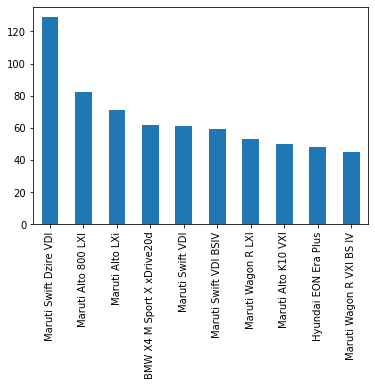

In [9]:
#showing top 10 selling cars

cars2.name.value_counts().head(10).plot(kind='bar')
plt.show()

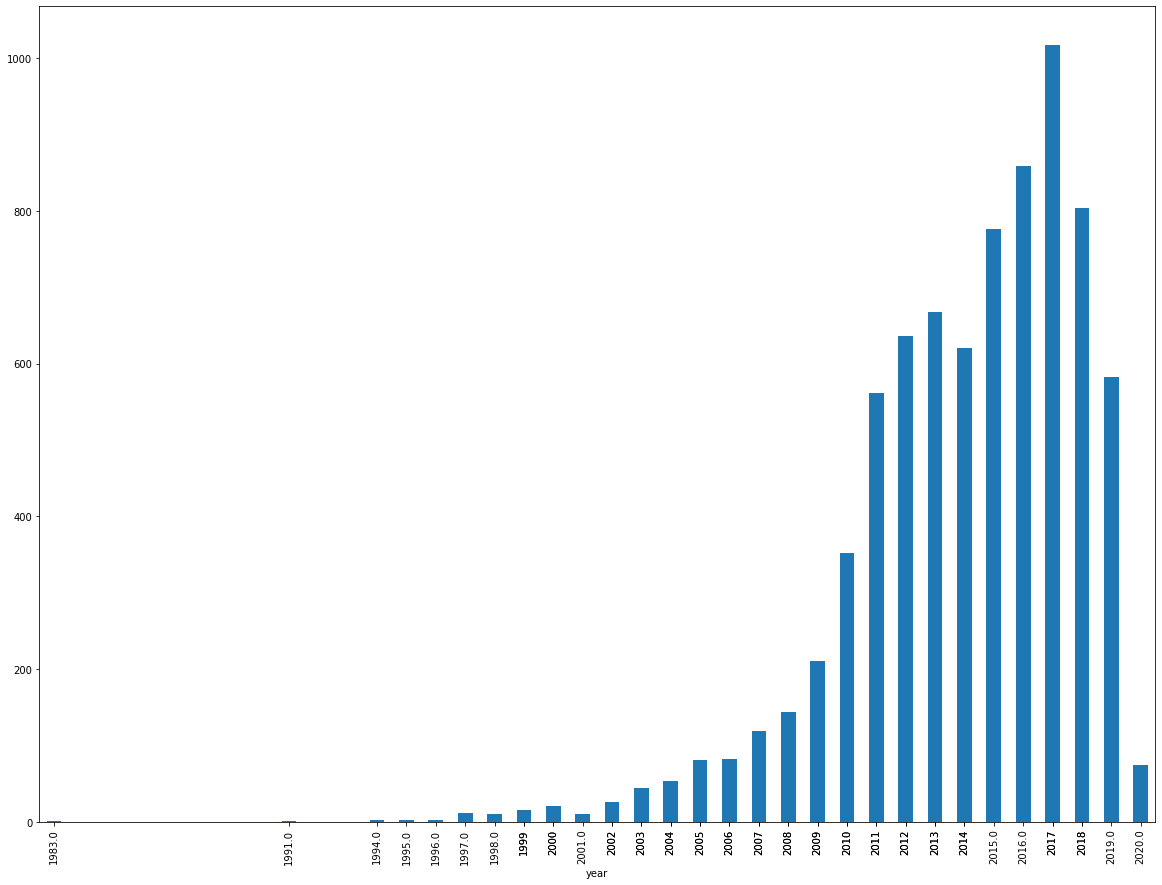

In [10]:
#yearwise sales
plt.figure(figsize=(20,15))
cars2.groupby('year').count()['name'].plot(kind='bar')
plt.show()

<AxesSubplot:xlabel='fuel', ylabel='count'>

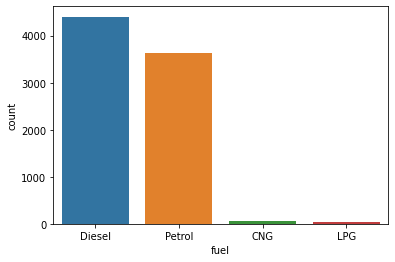

In [11]:
sns.countplot(cars2.fuel)

<AxesSubplot:xlabel='seller_type', ylabel='count'>

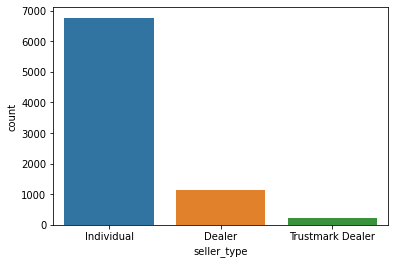

In [12]:
sns.countplot(cars2.seller_type)

<AxesSubplot:xlabel='transmission', ylabel='count'>

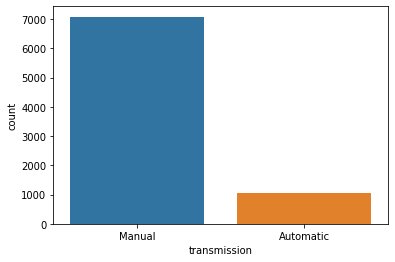

In [13]:
sns.countplot(cars2.transmission)

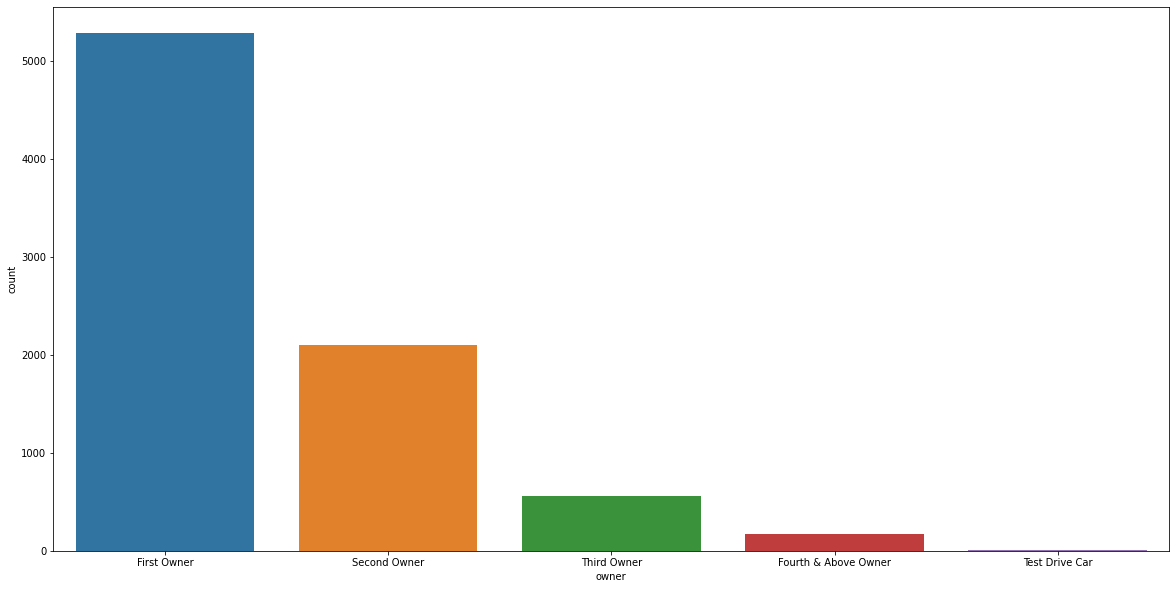

In [14]:
plt.figure(figsize=(20,10))
sns.countplot(cars2.owner)
plt.show()

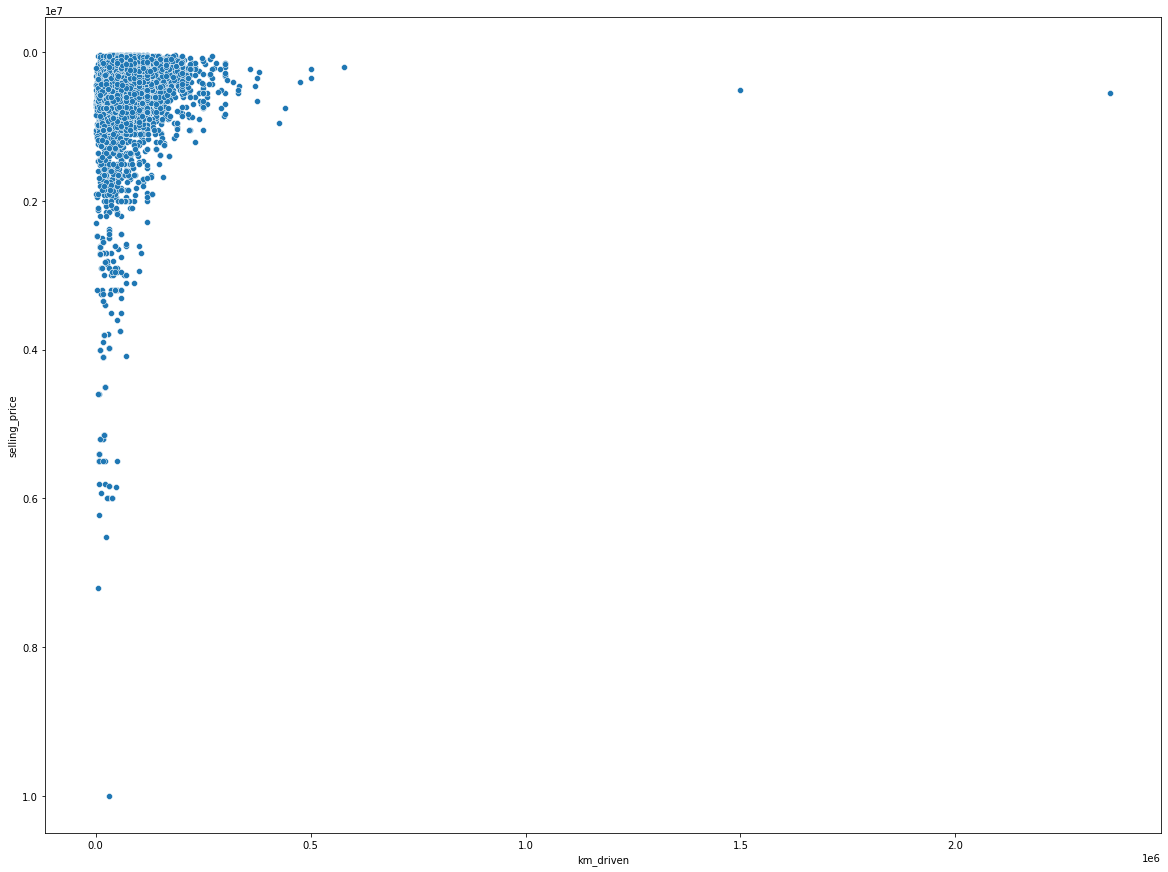

In [15]:
#kms vs selling price
plt.figure(figsize=(20,15))
sns.scatterplot(x=cars2.km_driven,y=cars2.selling_price)
plt.show()

In [16]:
cars2

name    year selling_price km_driven    fuel  \
0           Maruti Swift Dzire VDI  2014.0      450000.0  145500.0  Diesel   
1     Skoda Rapid 1.5 TDI Ambition  2014.0      370000.0  120000.0  Diesel   
2        Hyundai i20 Sportz Diesel  2010.0      225000.0  127000.0  Diesel   
3    Hyundai Xcent 1.2 VTVT E Plus  2017.0      440000.0   45000.0  Petrol   
4               Maruti 800 DX BSII  2001.0       45000.0    5000.0  Petrol   
..                             ...     ...           ...       ...     ...   
336       Maruti Wagon R LXI BSIII    2006        150000     50000  Petrol   
337                 Tata Indigo LS    2007         90177    129000  Diesel   
338   Ford Fiesta 1.4 Duratorq EXI    2007        125000    110000  Diesel   
339      Honda City 2017-2020 VTEC    2006        160000     70000  Petrol   
340          Hyundai Verna CRDi SX    2007        135000    119000  Diesel   

    seller_type transmission                 owner     mileage   engine  \
0    Individual       Manual           First Owner   23.4 kmpl  1248 CC   
1    Individual       Manual          Second Owner  21.14 kmpl  1498 CC   
2    Individual       Manual           First Owner   23.0 kmpl  1396 CC   
3    Individual       Manual           First Owner  20.14 kmpl  1197 CC   
4    Individual       Manual          Second Owner   16.1 kmpl   796 CC   
..          ...          ...                   ...         ...      ...   
336  Individual       Manual           Third Owner   14.0 kmpl  1061 CC   
337  Individual       Manual           Third Owner   17.0 kmpl  1405 CC   
338  Individual       Manual           Third Owner   17.8 kmpl  1399 CC   
339  Individual       Manual          Second Owner   16.9 kmpl  1497 CC   
340  Individual       Manual  Fourth & Above Owner   16.8 kmpl  1493 CC   

      max_power                      torque seats  
0        74 bhp              190Nm@ 2000rpm   5.0  
1    103.52 bhp         250Nm@ 1500-2500rpm   5.0  
2        90 bhp    22.4 kgm at 1750-2750rpm   5.0  
3     81.86 bhp           113.75nm@ 4000rpm   5.0  
4        37 bhp               59Nm@ 2500rpm   4.0  
..          ...                         ...   ...  
336      64 bhp       "8.6@ 3,500(kgm@ rpm)     5  
337      70 bhp      "13.5@ 2,500(kgm@ rpm)     5  
338      68 bhp      "16.3@ 2,000(kgm@ rpm)     5  
339     100 bhp      "13.5@ 4,800(kgm@ rpm)     5  
340     110 bhp  "24@ 1,900-2,750(kgm@ rpm)     5  

[8128 rows x 13 columns]

In [17]:
cars2.describe()

name    year  selling_price  km_driven    fuel  \
count                     8128  8128.0         8128.0     8128.0    8128   
unique                    2058    46.0          760.0      997.0       4   
top     Maruti Swift Dzire VDI  2017.0       300000.0   120000.0  Diesel   
freq                       129  1017.0          217.0      474.0    4402   

       seller_type transmission        owner    mileage   engine max_power  \
count         8128         8128         8128       7907     7907      7913   
unique           3            2            5        393      121       322   
top     Individual       Manual  First Owner  18.9 kmpl  1248 CC    74 bhp   
freq          6766         7078         5289        225     1017       377   

                torque   seats  
count             7906  7907.0  
unique             443    15.0  
top     190Nm@ 2000rpm     5.0  
freq               530  5944.0

In [18]:
cars2

name    year selling_price km_driven    fuel  \
0           Maruti Swift Dzire VDI  2014.0      450000.0  145500.0  Diesel   
1     Skoda Rapid 1.5 TDI Ambition  2014.0      370000.0  120000.0  Diesel   
2        Hyundai i20 Sportz Diesel  2010.0      225000.0  127000.0  Diesel   
3    Hyundai Xcent 1.2 VTVT E Plus  2017.0      440000.0   45000.0  Petrol   
4               Maruti 800 DX BSII  2001.0       45000.0    5000.0  Petrol   
..                             ...     ...           ...       ...     ...   
336       Maruti Wagon R LXI BSIII    2006        150000     50000  Petrol   
337                 Tata Indigo LS    2007         90177    129000  Diesel   
338   Ford Fiesta 1.4 Duratorq EXI    2007        125000    110000  Diesel   
339      Honda City 2017-2020 VTEC    2006        160000     70000  Petrol   
340          Hyundai Verna CRDi SX    2007        135000    119000  Diesel   

    seller_type transmission                 owner     mileage   engine  \
0    Individual       Manual           First Owner   23.4 kmpl  1248 CC   
1    Individual       Manual          Second Owner  21.14 kmpl  1498 CC   
2    Individual       Manual           First Owner   23.0 kmpl  1396 CC   
3    Individual       Manual           First Owner  20.14 kmpl  1197 CC   
4    Individual       Manual          Second Owner   16.1 kmpl   796 CC   
..          ...          ...                   ...         ...      ...   
336  Individual       Manual           Third Owner   14.0 kmpl  1061 CC   
337  Individual       Manual           Third Owner   17.0 kmpl  1405 CC   
338  Individual       Manual           Third Owner   17.8 kmpl  1399 CC   
339  Individual       Manual          Second Owner   16.9 kmpl  1497 CC   
340  Individual       Manual  Fourth & Above Owner   16.8 kmpl  1493 CC   

      max_power                      torque seats  
0        74 bhp              190Nm@ 2000rpm   5.0  
1    103.52 bhp         250Nm@ 1500-2500rpm   5.0  
2        90 bhp    22.4 kgm at 1750-2750rpm   5.0  
3     81.86 bhp           113.75nm@ 4000rpm   5.0  
4        37 bhp               59Nm@ 2500rpm   4.0  
..          ...                         ...   ...  
336      64 bhp       "8.6@ 3,500(kgm@ rpm)     5  
337      70 bhp      "13.5@ 2,500(kgm@ rpm)     5  
338      68 bhp      "16.3@ 2,000(kgm@ rpm)     5  
339     100 bhp      "13.5@ 4,800(kgm@ rpm)     5  
340     110 bhp  "24@ 1,900-2,750(kgm@ rpm)     5  

[8128 rows x 13 columns]

In [19]:
#suppressed data points which has been driven more than 1 million kms as they seem to be outlier
cars2["km_driven"] = cars2.km_driven.astype(float)
cars2.loc[cars2['km_driven'] > 1000000, 'km_driven'] = 500000

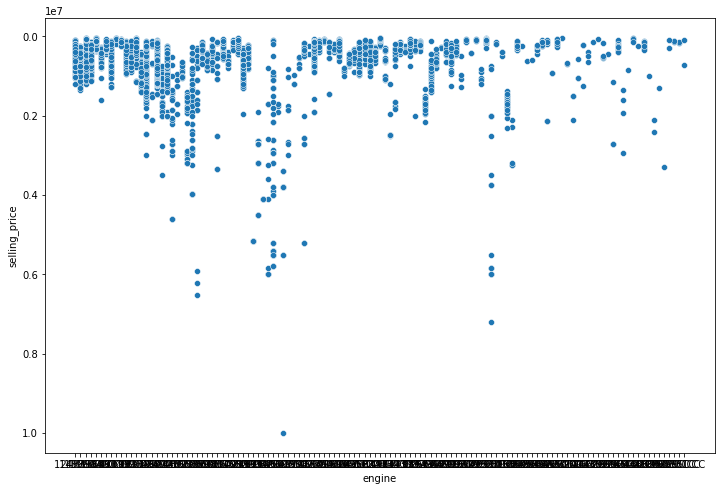

In [20]:


#engine vs selling_price
plt.figure(figsize=(12,8))
sns.scatterplot(cars2.engine,cars2.selling_price)
plt.show()

In [21]:
#Handling torque field to change it to numerical
cars2['torque'] = cars2.torque.str.replace("at",'@')

In [22]:
cars2['mileage'] = cars2.mileage.str.replace(r"[a-zA-Z]",'')
cars2['engine'] = cars2.engine.str.replace(r"[a-zA-Z]",'')
cars2['max_power'] = cars2.max_power.str.replace(r"[a-zA-Z]",'')
cars2['torque'] = cars2.torque.str.replace(r"[a-zA-Z]",'')

In [23]:
cars2

name    year selling_price  km_driven    fuel  \
0           Maruti Swift Dzire VDI  2014.0      450000.0   145500.0  Diesel   
1     Skoda Rapid 1.5 TDI Ambition  2014.0      370000.0   120000.0  Diesel   
2        Hyundai i20 Sportz Diesel  2010.0      225000.0   127000.0  Diesel   
3    Hyundai Xcent 1.2 VTVT E Plus  2017.0      440000.0    45000.0  Petrol   
4               Maruti 800 DX BSII  2001.0       45000.0     5000.0  Petrol   
..                             ...     ...           ...        ...     ...   
336       Maruti Wagon R LXI BSIII    2006        150000    50000.0  Petrol   
337                 Tata Indigo LS    2007         90177   129000.0  Diesel   
338   Ford Fiesta 1.4 Duratorq EXI    2007        125000   110000.0  Diesel   
339      Honda City 2017-2020 VTEC    2006        160000    70000.0  Petrol   
340          Hyundai Verna CRDi SX    2007        135000   119000.0  Diesel   

    seller_type transmission                 owner mileage engine max_power  \
0    Individual       Manual           First Owner   23.4   1248        74    
1    Individual       Manual          Second Owner  21.14   1498    103.52    
2    Individual       Manual           First Owner   23.0   1396        90    
3    Individual       Manual           First Owner  20.14   1197     81.86    
4    Individual       Manual          Second Owner   16.1    796        37    
..          ...          ...                   ...     ...    ...       ...   
336  Individual       Manual           Third Owner   14.0   1061        64    
337  Individual       Manual           Third Owner   17.0   1405        70    
338  Individual       Manual           Third Owner   17.8   1399        68    
339  Individual       Manual          Second Owner   16.9   1497       100    
340  Individual       Manual  Fourth & Above Owner   16.8   1493       110    

                   torque seats  
0               190@ 2000   5.0  
1          250@ 1500-2500   5.0  
2       22.4  @ 1750-2750   5.0  
3            113.75@ 4000   5.0  
4                59@ 2500   4.0  
..                    ...   ...  
336       "8.6@ 3,500(@ )     5  
337      "13.5@ 2,500(@ )     5  
338      "16.3@ 2,000(@ )     5  
339      "13.5@ 4,800(@ )     5  
340  "24@ 1,900-2,750(@ )     5  

[8128 rows x 13 columns]

In [24]:
cars2["engine"] = cars2.engine.astype(float)

In [25]:
cars4 =cars2.groupby(['engine', 'year'])
cars4.first()

name selling_price  km_driven  \
engine year                                                                  
624.0  2009.0                        Tata Nano Cx       70000.0    15000.0   
       2010.0                   Tata Nano Lx BSIV       65000.0    26432.0   
       2011.0                        Tata Nano Cx       45000.0    10000.0   
       2012.0                       Tata Nano STD       64000.0    18000.0   
       2013.0                        Tata Nano CX       80000.0    30000.0   
...                                           ...           ...        ...   
2999.0 2019.0                       Isuzu MUX 2WD     2700000.0    10000.0   
3198.0 2016.0  Ford Endeavour 3.2 Titanium AT 4X4     2280000.0   120000.0   
       2018.0  Ford Endeavour 3.2 Titanium AT 4X4     3250000.0    12000.0   
3498.0 2009.0   Mercedes-Benz E-Class E350 Petrol     1000000.0    80000.0   
3604.0 2017.0     Jeep Wrangler 2016-2019 3.6 4X4     4100000.0    17000.0   

                 fuel seller_type transmission         owner mileage  \
engine year                                                            
624.0  2009.0  Petrol  Individual       Manual   First Owner   26.0    
       2010.0  Petrol      Dealer       Manual   First Owner   25.4    
       2011.0  Petrol  Individual       Manual   Third Owner   26.0    
       2012.0  Petrol      Dealer       Manual   First Owner   25.4    
       2013.0  Petrol  Individual       Manual   First Owner   25.4    
...               ...         ...          ...           ...     ...   
2999.0 2019.0  Diesel  Individual    Automatic   First Owner   13.8    
3198.0 2016.0  Diesel  Individual    Automatic  Second Owner  10.91    
       2018.0  Diesel  Individual    Automatic   First Owner  10.91    
3498.0 2009.0  Petrol  Individual    Automatic   Third Owner  10.93    
3604.0 2017.0  Petrol  Individual    Automatic   First Owner    9.5    

              max_power          torque seats  
engine year                                    
624.0  2009.0       35         48@ 3000   4.0  
       2010.0    37.48   51@ 4000+/-500   4.0  
       2011.0       35         48@ 3000   4.0  
       2012.0     37.5         51@ 4000   4.0  
       2013.0    37.48   51@ 4000+/-500   4.0  
...                 ...             ...   ...  
2999.0 2019.0   174.57   380@ 1800-2800   7.0  
3198.0 2016.0      197   470@ 1750-2500   7.0  
       2018.0      197   470@ 1750-2500   7.0  
3498.0 2009.0      272        355@ 4500   5.0  
3604.0 2017.0      280        347@ 4300   5.0  

[838 rows x 11 columns]

In [26]:
cars2

name    year selling_price  km_driven    fuel  \
0           Maruti Swift Dzire VDI  2014.0      450000.0   145500.0  Diesel   
1     Skoda Rapid 1.5 TDI Ambition  2014.0      370000.0   120000.0  Diesel   
2        Hyundai i20 Sportz Diesel  2010.0      225000.0   127000.0  Diesel   
3    Hyundai Xcent 1.2 VTVT E Plus  2017.0      440000.0    45000.0  Petrol   
4               Maruti 800 DX BSII  2001.0       45000.0     5000.0  Petrol   
..                             ...     ...           ...        ...     ...   
336       Maruti Wagon R LXI BSIII    2006        150000    50000.0  Petrol   
337                 Tata Indigo LS    2007         90177   129000.0  Diesel   
338   Ford Fiesta 1.4 Duratorq EXI    2007        125000   110000.0  Diesel   
339      Honda City 2017-2020 VTEC    2006        160000    70000.0  Petrol   
340          Hyundai Verna CRDi SX    2007        135000   119000.0  Diesel   

    seller_type transmission                 owner mileage  engine max_power  \
0    Individual       Manual           First Owner   23.4   1248.0       74    
1    Individual       Manual          Second Owner  21.14   1498.0   103.52    
2    Individual       Manual           First Owner   23.0   1396.0       90    
3    Individual       Manual           First Owner  20.14   1197.0    81.86    
4    Individual       Manual          Second Owner   16.1    796.0       37    
..          ...          ...                   ...     ...     ...       ...   
336  Individual       Manual           Third Owner   14.0   1061.0       64    
337  Individual       Manual           Third Owner   17.0   1405.0       70    
338  Individual       Manual           Third Owner   17.8   1399.0       68    
339  Individual       Manual          Second Owner   16.9   1497.0      100    
340  Individual       Manual  Fourth & Above Owner   16.8   1493.0      110    

                   torque seats  
0               190@ 2000   5.0  
1          250@ 1500-2500   5.0  
2       22.4  @ 1750-2750   5.0  
3            113.75@ 4000   5.0  
4                59@ 2500   4.0  
..                    ...   ...  
336       "8.6@ 3,500(@ )     5  
337      "13.5@ 2,500(@ )     5  
338      "16.3@ 2,000(@ )     5  
339      "13.5@ 4,800(@ )     5  
340  "24@ 1,900-2,750(@ )     5  

[8128 rows x 13 columns]

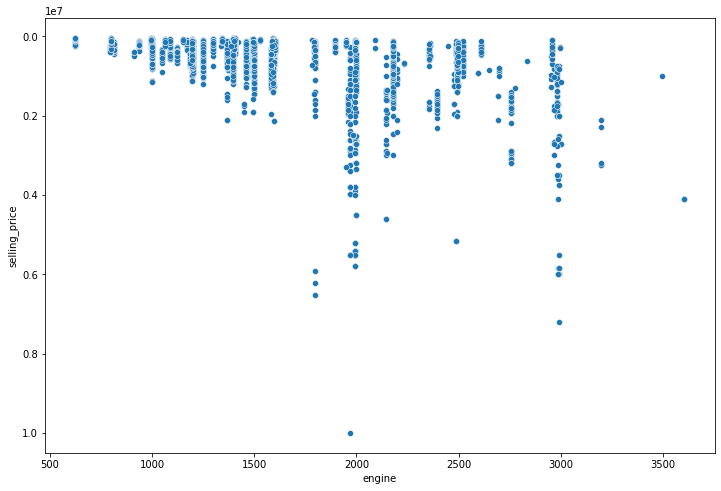

In [27]:
#engine vs selling_price
plt.figure(figsize=(12,8))
sns.scatterplot(cars2.engine,cars2.selling_price)
plt.show()

In [28]:
cars2.shape

(8128, 13)

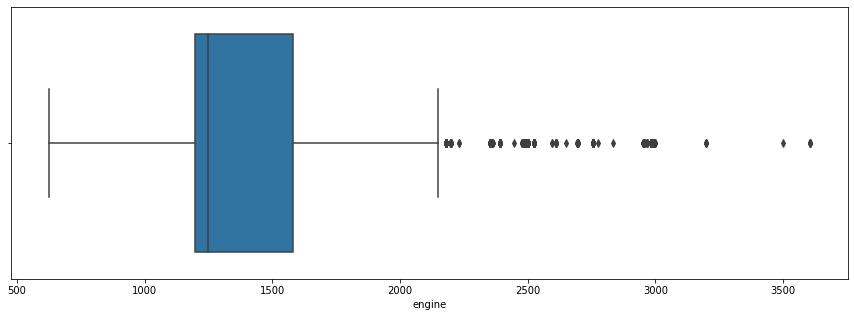

In [29]:
# box plot for engine
plt.figure(figsize=(15,5))
sns.boxplot(cars2.engine)
plt.show()

In [30]:
cars2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8128 entries, 0 to 340
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   object 
 2   selling_price  8128 non-null   object 
 3   km_driven      8128 non-null   float64
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   float64
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [31]:
cars2['mileage'] = cars2.mileage.str.replace(r"/",'',regex=True)
#cars2['max_power'] = cars2.max_power.str.replace(r"''",'',regex=True)

In [32]:
CarsN = cars2[cars2.isna().any(axis=1)]
CarsN

name    year selling_price  km_driven  \
10                    Maruti Swift 1.3 VXi  2007.0      200000.0    80000.0   
28                      Fiat Palio 1.2 ELX  2003.0       70000.0    50000.0   
75                         Tata Indica DLS  2003.0       50000.0    70000.0   
84             Maruti Swift VDI BSIV W ABS  2015.0      475000.0    78000.0   
116                  Maruti Swift VDI BSIV  2010.0      300000.0   120000.0   
...                                    ...     ...           ...        ...   
7517                Toyota Qualis Fleet A3  2000.0      200000.0   100000.0   
7664             Hyundai Santro LS zipPlus  2000.0      140000.0    50000.0   
7676  Hyundai Santro Xing XS eRLX Euro III  2006.0      145000.0    80000.0   
7732             Ford Figo Aspire Facelift  2017.0      580000.0   165000.0   
7764                  Maruti Swift 1.3 VXi  2006.0      130000.0   100000.0   

        fuel seller_type transmission         owner mileage  engine max_power  \
10    Petrol  Individual       Manual  Second Owner     NaN     NaN       NaN   
28    Petrol  Individual       Manual  Second Owner     NaN     NaN       NaN   
75    Diesel  Individual       Manual   First Owner     NaN     NaN       NaN   
84    Diesel      Dealer       Manual   First Owner     NaN     NaN       NaN   
116   Diesel  Individual       Manual  Second Owner     NaN     NaN       NaN   
...      ...         ...          ...           ...     ...     ...       ...   
7517  Diesel  Individual       Manual   First Owner     NaN     NaN       NaN   
7664  Petrol  Individual       Manual  Second Owner     NaN     NaN       NaN   
7676  Petrol  Individual       Manual  Second Owner     NaN     NaN       NaN   
7732  Diesel  Individual       Manual   First Owner     NaN     NaN       NaN   
7764  Petrol  Individual       Manual  Second Owner     NaN     NaN       NaN   

     torque seats  
10      NaN   NaN  
28      NaN   NaN  
75      NaN   NaN  
84      NaN   NaN  
116     NaN   NaN  
...     ...   ...  
7517    NaN   NaN  
7664    NaN   NaN  
7676    NaN   NaN  
7732    NaN   NaN  
7764    NaN   NaN  

[222 rows x 13 columns]

In [33]:
cars3 = cars2.dropna()

In [34]:
cars3["selling_price"] = cars3.selling_price.astype(float)
cars3["mileage"] = cars3.mileage.astype(float)
cars3["max_power"] = cars3.max_power.astype(float)
cars3["seats"] = cars3.seats.astype(float)

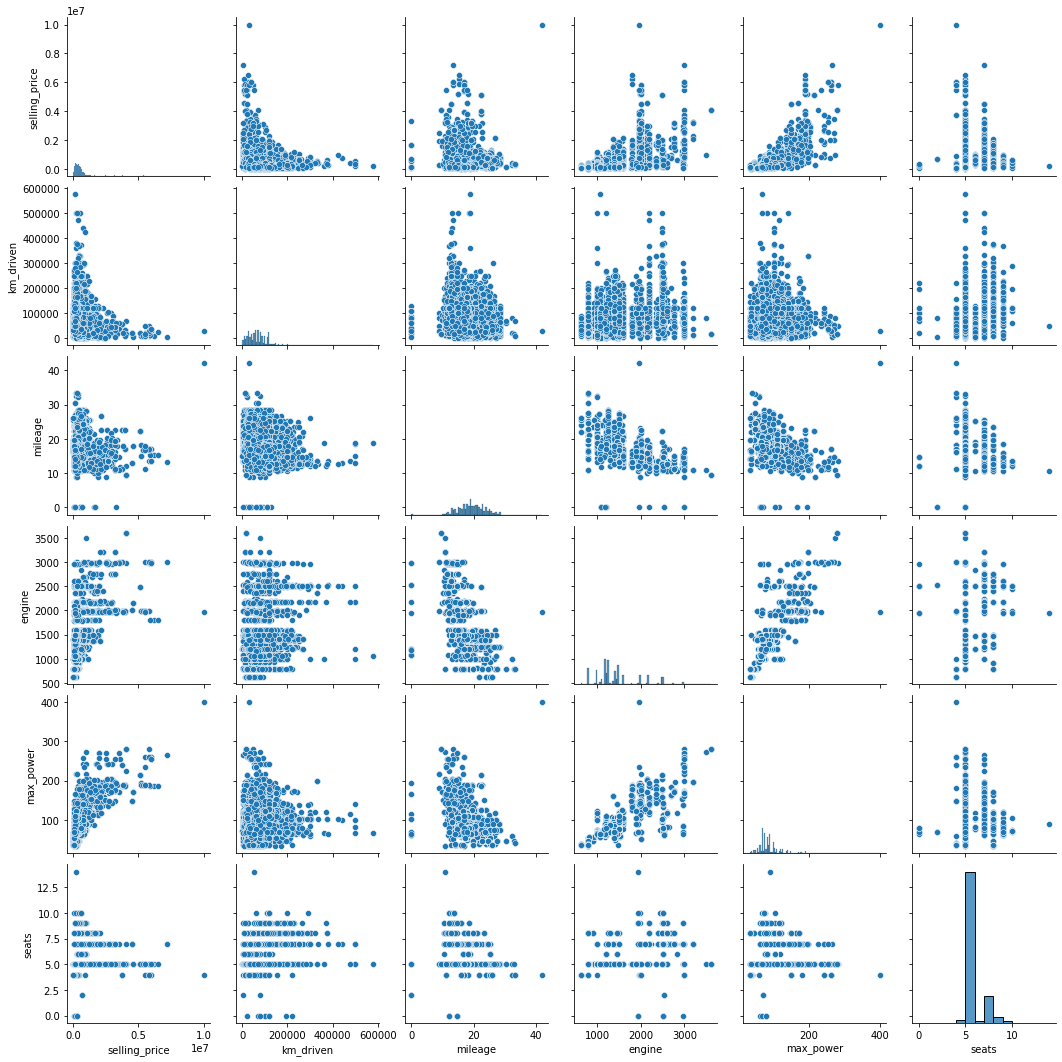

In [35]:
sns.pairplot(cars3)
plt.show()

In [36]:
cars3

name    year  selling_price  km_driven    fuel  \
0           Maruti Swift Dzire VDI  2014.0       450000.0   145500.0  Diesel   
1     Skoda Rapid 1.5 TDI Ambition  2014.0       370000.0   120000.0  Diesel   
2        Hyundai i20 Sportz Diesel  2010.0       225000.0   127000.0  Diesel   
3    Hyundai Xcent 1.2 VTVT E Plus  2017.0       440000.0    45000.0  Petrol   
4               Maruti 800 DX BSII  2001.0        45000.0     5000.0  Petrol   
..                             ...     ...            ...        ...     ...   
336       Maruti Wagon R LXI BSIII    2006       150000.0    50000.0  Petrol   
337                 Tata Indigo LS    2007        90177.0   129000.0  Diesel   
338   Ford Fiesta 1.4 Duratorq EXI    2007       125000.0   110000.0  Diesel   
339      Honda City 2017-2020 VTEC    2006       160000.0    70000.0  Petrol   
340          Hyundai Verna CRDi SX    2007       135000.0   119000.0  Diesel   

    seller_type transmission                 owner  mileage  engine  \
0    Individual       Manual           First Owner    23.40  1248.0   
1    Individual       Manual          Second Owner    21.14  1498.0   
2    Individual       Manual           First Owner    23.00  1396.0   
3    Individual       Manual           First Owner    20.14  1197.0   
4    Individual       Manual          Second Owner    16.10   796.0   
..          ...          ...                   ...      ...     ...   
336  Individual       Manual           Third Owner    14.00  1061.0   
337  Individual       Manual           Third Owner    17.00  1405.0   
338  Individual       Manual           Third Owner    17.80  1399.0   
339  Individual       Manual          Second Owner    16.90  1497.0   
340  Individual       Manual  Fourth & Above Owner    16.80  1493.0   

     max_power                torque  seats  
0        74.00             190@ 2000    5.0  
1       103.52        250@ 1500-2500    5.0  
2        90.00     22.4  @ 1750-2750    5.0  
3        81.86          113.75@ 4000    5.0  
4        37.00              59@ 2500    4.0  
..         ...                   ...    ...  
336      64.00       "8.6@ 3,500(@ )    5.0  
337      70.00      "13.5@ 2,500(@ )    5.0  
338      68.00      "16.3@ 2,000(@ )    5.0  
339     100.00      "13.5@ 4,800(@ )    5.0  
340     110.00  "24@ 1,900-2,750(@ )    5.0  

[7906 rows x 13 columns]

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
le = LabelEncoder()

In [39]:
cars4 = cars3.copy()

In [40]:
#Label encoding to fit into algorithm
cars3.fuel = le.fit_transform(cars3.fuel)
cars3.transmission = le.fit_transform(cars3.transmission)
cars3.seller_type = le.fit_transform(cars3.seller_type)
cars3.owner = le.fit_transform(cars3.owner)

In [41]:
cars3

name    year  selling_price  km_driven  fuel  \
0           Maruti Swift Dzire VDI  2014.0       450000.0   145500.0     1   
1     Skoda Rapid 1.5 TDI Ambition  2014.0       370000.0   120000.0     1   
2        Hyundai i20 Sportz Diesel  2010.0       225000.0   127000.0     1   
3    Hyundai Xcent 1.2 VTVT E Plus  2017.0       440000.0    45000.0     3   
4               Maruti 800 DX BSII  2001.0        45000.0     5000.0     3   
..                             ...     ...            ...        ...   ...   
336       Maruti Wagon R LXI BSIII    2006       150000.0    50000.0     3   
337                 Tata Indigo LS    2007        90177.0   129000.0     1   
338   Ford Fiesta 1.4 Duratorq EXI    2007       125000.0   110000.0     1   
339      Honda City 2017-2020 VTEC    2006       160000.0    70000.0     3   
340          Hyundai Verna CRDi SX    2007       135000.0   119000.0     1   

     seller_type  transmission  owner  mileage  engine  max_power  \
0              1             1      0    23.40  1248.0      74.00   
1              1             1      2    21.14  1498.0     103.52   
2              1             1      0    23.00  1396.0      90.00   
3              1             1      0    20.14  1197.0      81.86   
4              1             1      2    16.10   796.0      37.00   
..           ...           ...    ...      ...     ...        ...   
336            1             1      4    14.00  1061.0      64.00   
337            1             1      4    17.00  1405.0      70.00   
338            1             1      4    17.80  1399.0      68.00   
339            1             1      2    16.90  1497.0     100.00   
340            1             1      1    16.80  1493.0     110.00   

                   torque  seats  
0               190@ 2000    5.0  
1          250@ 1500-2500    5.0  
2       22.4  @ 1750-2750    5.0  
3            113.75@ 4000    5.0  
4                59@ 2500    4.0  
..                    ...    ...  
336       "8.6@ 3,500(@ )    5.0  
337      "13.5@ 2,500(@ )    5.0  
338      "16.3@ 2,000(@ )    5.0  
339      "13.5@ 4,800(@ )    5.0  
340  "24@ 1,900-2,750(@ )    5.0  

[7906 rows x 13 columns]

In [42]:
cars3['torque'] = cars3['torque'].str.replace(r"\(.*\)","")

In [43]:
cars3

name    year  selling_price  km_driven  fuel  \
0           Maruti Swift Dzire VDI  2014.0       450000.0   145500.0     1   
1     Skoda Rapid 1.5 TDI Ambition  2014.0       370000.0   120000.0     1   
2        Hyundai i20 Sportz Diesel  2010.0       225000.0   127000.0     1   
3    Hyundai Xcent 1.2 VTVT E Plus  2017.0       440000.0    45000.0     3   
4               Maruti 800 DX BSII  2001.0        45000.0     5000.0     3   
..                             ...     ...            ...        ...   ...   
336       Maruti Wagon R LXI BSIII    2006       150000.0    50000.0     3   
337                 Tata Indigo LS    2007        90177.0   129000.0     1   
338   Ford Fiesta 1.4 Duratorq EXI    2007       125000.0   110000.0     1   
339      Honda City 2017-2020 VTEC    2006       160000.0    70000.0     3   
340          Hyundai Verna CRDi SX    2007       135000.0   119000.0     1   

     seller_type  transmission  owner  mileage  engine  max_power  \
0              1             1      0    23.40  1248.0      74.00   
1              1             1      2    21.14  1498.0     103.52   
2              1             1      0    23.00  1396.0      90.00   
3              1             1      0    20.14  1197.0      81.86   
4              1             1      2    16.10   796.0      37.00   
..           ...           ...    ...      ...     ...        ...   
336            1             1      4    14.00  1061.0      64.00   
337            1             1      4    17.00  1405.0      70.00   
338            1             1      4    17.80  1399.0      68.00   
339            1             1      2    16.90  1497.0     100.00   
340            1             1      1    16.80  1493.0     110.00   

                torque  seats  
0            190@ 2000    5.0  
1       250@ 1500-2500    5.0  
2    22.4  @ 1750-2750    5.0  
3         113.75@ 4000    5.0  
4             59@ 2500    4.0  
..                 ...    ...  
336        "8.6@ 3,500    5.0  
337       "13.5@ 2,500    5.0  
338       "16.3@ 2,000    5.0  
339       "13.5@ 4,800    5.0  
340   "24@ 1,900-2,750    5.0  

[7906 rows x 13 columns]

In [44]:
cars3['torque'] = cars3['torque'].str.replace('"',"")
cars3['torque'] = cars3['torque'].str.replace(',',"")

In [45]:
cars3

name    year  selling_price  km_driven  fuel  \
0           Maruti Swift Dzire VDI  2014.0       450000.0   145500.0     1   
1     Skoda Rapid 1.5 TDI Ambition  2014.0       370000.0   120000.0     1   
2        Hyundai i20 Sportz Diesel  2010.0       225000.0   127000.0     1   
3    Hyundai Xcent 1.2 VTVT E Plus  2017.0       440000.0    45000.0     3   
4               Maruti 800 DX BSII  2001.0        45000.0     5000.0     3   
..                             ...     ...            ...        ...   ...   
336       Maruti Wagon R LXI BSIII    2006       150000.0    50000.0     3   
337                 Tata Indigo LS    2007        90177.0   129000.0     1   
338   Ford Fiesta 1.4 Duratorq EXI    2007       125000.0   110000.0     1   
339      Honda City 2017-2020 VTEC    2006       160000.0    70000.0     3   
340          Hyundai Verna CRDi SX    2007       135000.0   119000.0     1   

     seller_type  transmission  owner  mileage  engine  max_power  \
0              1             1      0    23.40  1248.0      74.00   
1              1             1      2    21.14  1498.0     103.52   
2              1             1      0    23.00  1396.0      90.00   
3              1             1      0    20.14  1197.0      81.86   
4              1             1      2    16.10   796.0      37.00   
..           ...           ...    ...      ...     ...        ...   
336            1             1      4    14.00  1061.0      64.00   
337            1             1      4    17.00  1405.0      70.00   
338            1             1      4    17.80  1399.0      68.00   
339            1             1      2    16.90  1497.0     100.00   
340            1             1      1    16.80  1493.0     110.00   

                torque  seats  
0            190@ 2000    5.0  
1       250@ 1500-2500    5.0  
2    22.4  @ 1750-2750    5.0  
3         113.75@ 4000    5.0  
4             59@ 2500    4.0  
..                 ...    ...  
336          8.6@ 3500    5.0  
337         13.5@ 2500    5.0  
338         16.3@ 2000    5.0  
339         13.5@ 4800    5.0  
340      24@ 1900-2750    5.0  

[7906 rows x 13 columns]

In [46]:
out = pd.DataFrame(cars3['torque'].str.split('@',1).tolist(),columns=['torque1','engine_rpm'])
out

torque1  engine_rpm
0        190        2000
1        250   1500-2500
2     22.4     1750-2750
3     113.75        4000
4         59        2500
...      ...         ...
7901     8.6        3500
7902    13.5        2500
7903    16.3        2000
7904    13.5        4800
7905      24   1900-2750

[7906 rows x 2 columns]

In [47]:
columns = out['torque1']

In [48]:
columns = (out['engine_rpm'],out['torque1'])

In [49]:
columns

(0             2000
 1        1500-2500
 2        1750-2750
 3             4000
 4             2500
            ...    
 7901          3500
 7902          2500
 7903          2000
 7904          4800
 7905     1900-2750
 Name: engine_rpm, Length: 7906, dtype: object,
 0          190
 1          250
 2       22.4  
 3       113.75
 4           59
          ...  
 7901       8.6
 7902      13.5
 7903      16.3
 7904      13.5
 7905        24
 Name: torque1, Length: 7906, dtype: object)

In [50]:

cars3 = cars3.join(columns)

In [51]:
del cars3['torque']

In [52]:
cars3 =cars3.rename(columns={'torque1': 'torque'})

In [53]:
cars3

name    year  selling_price  km_driven  fuel  \
0           Maruti Swift Dzire VDI  2014.0       450000.0   145500.0     1   
0         Honda City 2017-2020 EXi    2006       158000.0   140000.0     3   
1     Skoda Rapid 1.5 TDI Ambition  2014.0       370000.0   120000.0     1   
1           Maruti Swift VXI BSIII    2007       130000.0   120000.0     3   
2        Hyundai i20 Sportz Diesel  2010.0       225000.0   127000.0     1   
...                            ...     ...            ...        ...   ...   
7782    Hyundai i20 Magna 1.4 CRDi  2014.0       475000.0    80000.0     1   
7783             Hyundai i20 Magna  2013.0       320000.0   110000.0     3   
7784        Maruti Swift Dzire ZDi  2009.0       382000.0   120000.0     1   
7785               Tata Indigo CR4  2013.0       290000.0    25000.0     1   
7786               Tata Indigo CR4  2013.0       290000.0    25000.0     1   

      seller_type  transmission  owner  mileage  engine  max_power  seats  \
0               1             1      0    23.40  1248.0      74.00    5.0   
0               1             1      4    17.70  1497.0      78.00    5.0   
1               1             1      2    21.14  1498.0     103.52    5.0   
1               1             1      0    16.10  1298.0      88.20    5.0   
2               1             1      0    23.00  1396.0      90.00    5.0   
...           ...           ...    ...      ...     ...        ...    ...   
7782            1             1      2    22.54  1396.0      88.73    5.0   
7783            1             1      0    18.50  1197.0      82.85    5.0   
7784            1             1      0    19.30  1248.0      73.90    5.0   
7785            1             1      0    23.57  1396.0      70.00    5.0   
7786            1             1      0    23.57  1396.0      70.00    5.0   

       engine_rpm  torque  
0            2000     190  
0            2000     190  
1       1500-2500     250  
1       1500-2500     250  
2       1750-2750  22.4    
...           ...     ...  
7782         3000    14.9  
7783    1900-2750      24  
7784   1500-3000    250    
7785         2700    12.7  
7786         4500     7.8  

[7906 rows x 14 columns]

In [54]:
duplicateRowsDF = cars3[cars3.duplicated(keep='first')]
duplicateRowsDF

name    year  selling_price  \
360                            Lexus ES 300h  2019.0      5150000.0   
361           Jaguar XF 2.0 Diesel Portfolio  2017.0      3200000.0   
396                            Lexus ES 300h  2019.0      5150000.0   
1039          Jaguar XF 2.0 Diesel Portfolio  2017.0      3200000.0   
1051              BMW X4 M Sport X xDrive20d  2019.0      5400000.0   
...                                      ...     ...            ...   
7537                           Honda Jazz VX  2016.0       550000.0   
7538  Toyota Innova 2.5 VX (Diesel) 7 Seater  2013.0       750000.0   
7539                Maruti Swift AMT VVT VXI  2019.0       650000.0   
7540                         Toyota Etios VX  2017.0       625000.0   
7545           Honda Amaze V CVT Petrol BSIV  2019.0       779000.0   

      km_driven  fuel  seller_type  transmission  owner  mileage  engine  \
360     20000.0     3            0             0      0    22.37  2487.0   
361     45000.0     1            0             0      0    19.33  1999.0   
396     20000.0     3            0             0      0    22.37  2487.0   
1039    45000.0     1            0             0      0    19.33  1999.0   
1051     7500.0     1            0             0      0    16.78  1995.0   
...         ...   ...          ...           ...    ...      ...     ...   
7537    56494.0     3            2             1      0    18.20  1199.0   
7538    79328.0     1            2             1      2    12.99  2494.0   
7539     5621.0     3            2             0      0    22.00  1197.0   
7540    25538.0     3            2             1      0    16.78  1496.0   
7545     7032.0     3            2             0      0    19.00  1199.0   

      max_power  seats  engine_rpm torque  
360      214.56    5.0   1750-2500    400  
361      177.00    5.0   1750-2500    400  
396      214.56    5.0   1750-2500    400  
1039     177.00    5.0   1750-2500    400  
1051     190.00    5.0        2000    190  
...         ...    ...         ...    ...  
7537      88.70    5.0   1750-3250    205  
7538     100.60    7.0        2000    190  
7539      81.80    5.0   1600-2800    330  
7540      88.73    5.0   1500-2750    260  
7545      88.76    5.0        1900    200  

[123 rows x 14 columns]

In [55]:
carsf = cars3.drop_duplicates(['name','year','km_driven','selling_price','owner','engine'], keep='first', inplace=False)
carsf

name    year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014.0       450000.0   145500.0   
0              Honda City 2017-2020 EXi    2006       158000.0   140000.0   
1          Skoda Rapid 1.5 TDI Ambition  2014.0       370000.0   120000.0   
1                Maruti Swift VXI BSIII    2007       130000.0   120000.0   
2             Hyundai i20 Sportz Diesel  2010.0       225000.0   127000.0   
...                                 ...     ...            ...        ...   
7780            Hyundai Santro Xing GLS  2008.0       120000.0   191000.0   
7781  Maruti Wagon R VXI BS IV with ABS  2013.0       260000.0    50000.0   
7782         Hyundai i20 Magna 1.4 CRDi  2014.0       475000.0    80000.0   
7783                  Hyundai i20 Magna  2013.0       320000.0   110000.0   
7784             Maruti Swift Dzire ZDi  2009.0       382000.0   120000.0   

      fuel  seller_type  transmission  owner  mileage  engine  max_power  \
0        1            1             1      0    23.40  1248.0      74.00   
0        3            1             1      4    17.70  1497.0      78.00   
1        1            1             1      2    21.14  1498.0     103.52   
1        3            1             1      0    16.10  1298.0      88.20   
2        1            1             1      0    23.00  1396.0      90.00   
...    ...          ...           ...    ...      ...     ...        ...   
7780     3            1             1      0    17.92  1086.0      62.10   
7781     3            1             1      2    18.90   998.0      67.10   
7782     1            1             1      2    22.54  1396.0      88.73   
7783     3            1             1      0    18.50  1197.0      82.85   
7784     1            1             1      0    19.30  1248.0      73.90   

      seats   engine_rpm  torque  
0       5.0         2000     190  
0       5.0         2000     190  
1       5.0    1500-2500     250  
1       5.0    1500-2500     250  
2       5.0    1750-2750  22.4    
...     ...          ...     ...  
7780    5.0         2500     5.7  
7781    5.0         2700    12.7  
7782    5.0         3000    14.9  
7783    5.0    1900-2750      24  
7784    5.0   1500-3000    250    

[6717 rows x 14 columns]

In [56]:
carsf = carsf.dropna()
carsf

name    year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014.0       450000.0   145500.0   
0              Honda City 2017-2020 EXi    2006       158000.0   140000.0   
1          Skoda Rapid 1.5 TDI Ambition  2014.0       370000.0   120000.0   
1                Maruti Swift VXI BSIII    2007       130000.0   120000.0   
2             Hyundai i20 Sportz Diesel  2010.0       225000.0   127000.0   
...                                 ...     ...            ...        ...   
7780            Hyundai Santro Xing GLS  2008.0       120000.0   191000.0   
7781  Maruti Wagon R VXI BS IV with ABS  2013.0       260000.0    50000.0   
7782         Hyundai i20 Magna 1.4 CRDi  2014.0       475000.0    80000.0   
7783                  Hyundai i20 Magna  2013.0       320000.0   110000.0   
7784             Maruti Swift Dzire ZDi  2009.0       382000.0   120000.0   

      fuel  seller_type  transmission  owner  mileage  engine  max_power  \
0        1            1             1      0    23.40  1248.0      74.00   
0        3            1             1      4    17.70  1497.0      78.00   
1        1            1             1      2    21.14  1498.0     103.52   
1        3            1             1      0    16.10  1298.0      88.20   
2        1            1             1      0    23.00  1396.0      90.00   
...    ...          ...           ...    ...      ...     ...        ...   
7780     3            1             1      0    17.92  1086.0      62.10   
7781     3            1             1      2    18.90   998.0      67.10   
7782     1            1             1      2    22.54  1396.0      88.73   
7783     3            1             1      0    18.50  1197.0      82.85   
7784     1            1             1      0    19.30  1248.0      73.90   

      seats   engine_rpm  torque  
0       5.0         2000     190  
0       5.0         2000     190  
1       5.0    1500-2500     250  
1       5.0    1500-2500     250  
2       5.0    1750-2750  22.4    
...     ...          ...     ...  
7780    5.0         2500     5.7  
7781    5.0         2700    12.7  
7782    5.0         3000    14.9  
7783    5.0    1900-2750      24  
7784    5.0   1500-3000    250    

[6682 rows x 14 columns]

In [57]:
carsf['engine_rpm'] = carsf['engine_rpm'].str.replace(r"\+.*","")
#carsf['engine_rpm'] = carsf.torque.str.replace(r"/",'')

In [58]:
carsf['engine_rpm'] = carsf['engine_rpm'].str.split('\-').str[-1].str.strip()
carsf['engine_rpm'] = carsf['engine_rpm'].str.split('\~').str[-1].str.strip()

In [59]:
carsf

name    year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014.0       450000.0   145500.0   
0              Honda City 2017-2020 EXi    2006       158000.0   140000.0   
1          Skoda Rapid 1.5 TDI Ambition  2014.0       370000.0   120000.0   
1                Maruti Swift VXI BSIII    2007       130000.0   120000.0   
2             Hyundai i20 Sportz Diesel  2010.0       225000.0   127000.0   
...                                 ...     ...            ...        ...   
7780            Hyundai Santro Xing GLS  2008.0       120000.0   191000.0   
7781  Maruti Wagon R VXI BS IV with ABS  2013.0       260000.0    50000.0   
7782         Hyundai i20 Magna 1.4 CRDi  2014.0       475000.0    80000.0   
7783                  Hyundai i20 Magna  2013.0       320000.0   110000.0   
7784             Maruti Swift Dzire ZDi  2009.0       382000.0   120000.0   

      fuel  seller_type  transmission  owner  mileage  engine  max_power  \
0        1            1             1      0    23.40  1248.0      74.00   
0        3            1             1      4    17.70  1497.0      78.00   
1        1            1             1      2    21.14  1498.0     103.52   
1        3            1             1      0    16.10  1298.0      88.20   
2        1            1             1      0    23.00  1396.0      90.00   
...    ...          ...           ...    ...      ...     ...        ...   
7780     3            1             1      0    17.92  1086.0      62.10   
7781     3            1             1      2    18.90   998.0      67.10   
7782     1            1             1      2    22.54  1396.0      88.73   
7783     3            1             1      0    18.50  1197.0      82.85   
7784     1            1             1      0    19.30  1248.0      73.90   

      seats engine_rpm  torque  
0       5.0       2000     190  
0       5.0       2000     190  
1       5.0       2500     250  
1       5.0       2500     250  
2       5.0       2750  22.4    
...     ...        ...     ...  
7780    5.0       2500     5.7  
7781    5.0       2700    12.7  
7782    5.0       3000    14.9  
7783    5.0       2750      24  
7784    5.0       3000   250    

[6682 rows x 14 columns]

In [60]:
carsf["torque"] = carsf.torque.astype(float)
carsf["engine_rpm"] = carsf.engine_rpm.astype(float)
carsf["year"] = carsf.year.astype(float)

In [61]:
carsf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6682 entries, 0 to 7784
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6682 non-null   object 
 1   year           6682 non-null   float64
 2   selling_price  6682 non-null   float64
 3   km_driven      6682 non-null   float64
 4   fuel           6682 non-null   int32  
 5   seller_type    6682 non-null   int32  
 6   transmission   6682 non-null   int32  
 7   owner          6682 non-null   int32  
 8   mileage        6682 non-null   float64
 9   engine         6682 non-null   float64
 10  max_power      6682 non-null   float64
 11  seats          6682 non-null   float64
 12  engine_rpm     6682 non-null   float64
 13  torque         6682 non-null   float64
dtypes: float64(9), int32(4), object(1)
memory usage: 678.6+ KB


In [62]:
carsf = carsf.reset_index(drop=True)

In [63]:
#converting the torque unit from kgm to nm
carskgm=carsf['torque'].tolist()

In [64]:
carsi=[]
for i in carskgm:
    if(i<40):
        i = i*9.80665;
        carsi.append(i);
    else:
          carsi.append(i);
    
    

In [65]:
carsi

[190.0,
 190.0,
 250.0,
 250.0,
 219.66895999999997,
 219.66895999999997,
 113.75,
 113.75,
 59.0,
 59.0,
 170.0,
 170.0,
 160.0,
 160.0,
 248.0,
 248.0,
 78.0,
 78.0,
 190.0,
 190.0,
 84.0,
 115.0,
 115.0,
 200.0,
 200.0,
 219.66895999999997,
 219.66895999999997,
 62.0,
 62.0,
 219.7,
 219.7,
 160.0,
 160.0,
 200.0,
 200.0,
 190.0,
 190.0,
 200.0,
 200.0,
 114.0,
 114.0,
 115.0,
 115.0,
 69.0,
 69.0,
 172.5,
 172.5,
 84.0,
 84.0,
 59.0,
 59.0,
 200.0,
 200.0,
 59.820564999999995,
 59.820564999999995,
 114.7,
 200.0,
 200.0,
 60.0,
 60.0,
 90.0,
 90.0,
 151.0,
 151.0,
 104.0,
 104.0,
 320.0,
 320.0,
 59.0,
 59.0,
 250.0,
 250.0,
 145.0,
 145.0,
 146.0,
 146.0,
 115.0,
 115.0,
 200.0,
 200.0,
 90.0,
 90.0,
 343.0,
 343.0,
 200.0,
 200.0,
 200.0,
 200.0,
 200.0,
 200.0,
 400.0,
 400.0,
 200.0,
 200.0,
 138.0,
 138.0,
 200.0,
 200.0,
 360.0,
 360.0,
 200.0,
 200.0,
 380.0,
 380.0,
 173.0,
 173.0,
 400.0,
 400.0,
 400.0,
 400.0,
 200.0,
 200.0,
 111.7,
 111.7,
 219.6,
 219.6,
 190.0,
 190.

In [66]:
carsf2 = carsf.copy()

In [67]:
carsf2 = carsf2.assign(torque1 = carsi)

In [68]:
carsf2['torque1'] = carsi

In [69]:
carsf2

name    year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014.0       450000.0   145500.0   
1              Honda City 2017-2020 EXi  2006.0       158000.0   140000.0   
2          Skoda Rapid 1.5 TDI Ambition  2014.0       370000.0   120000.0   
3                Maruti Swift VXI BSIII  2007.0       130000.0   120000.0   
4             Hyundai i20 Sportz Diesel  2010.0       225000.0   127000.0   
...                                 ...     ...            ...        ...   
6677            Hyundai Santro Xing GLS  2008.0       120000.0   191000.0   
6678  Maruti Wagon R VXI BS IV with ABS  2013.0       260000.0    50000.0   
6679         Hyundai i20 Magna 1.4 CRDi  2014.0       475000.0    80000.0   
6680                  Hyundai i20 Magna  2013.0       320000.0   110000.0   
6681             Maruti Swift Dzire ZDi  2009.0       382000.0   120000.0   

      fuel  seller_type  transmission  owner  mileage  engine  max_power  \
0        1            1             1      0    23.40  1248.0      74.00   
1        3            1             1      4    17.70  1497.0      78.00   
2        1            1             1      2    21.14  1498.0     103.52   
3        3            1             1      0    16.10  1298.0      88.20   
4        1            1             1      0    23.00  1396.0      90.00   
...    ...          ...           ...    ...      ...     ...        ...   
6677     3            1             1      0    17.92  1086.0      62.10   
6678     3            1             1      2    18.90   998.0      67.10   
6679     1            1             1      2    22.54  1396.0      88.73   
6680     3            1             1      0    18.50  1197.0      82.85   
6681     1            1             1      0    19.30  1248.0      73.90   

      seats  engine_rpm  torque     torque1  
0       5.0      2000.0   190.0  190.000000  
1       5.0      2000.0   190.0  190.000000  
2       5.0      2500.0   250.0  250.000000  
3       5.0      2500.0   250.0  250.000000  
4       5.0      2750.0    22.4  219.668960  
...     ...         ...     ...         ...  
6677    5.0      2500.0     5.7   55.897905  
6678    5.0      2700.0    12.7  124.544455  
6679    5.0      3000.0    14.9  146.119085  
6680    5.0      2750.0    24.0  235.359600  
6681    5.0      3000.0   250.0  250.000000  

[6682 rows x 15 columns]

In [70]:
del carsf2['torque']

In [71]:
carsf2 =carsf2.rename(columns={'torque1': 'torque'})

In [72]:
carsf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6682 entries, 0 to 6681
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6682 non-null   object 
 1   year           6682 non-null   float64
 2   selling_price  6682 non-null   float64
 3   km_driven      6682 non-null   float64
 4   fuel           6682 non-null   int32  
 5   seller_type    6682 non-null   int32  
 6   transmission   6682 non-null   int32  
 7   owner          6682 non-null   int32  
 8   mileage        6682 non-null   float64
 9   engine         6682 non-null   float64
 10  max_power      6682 non-null   float64
 11  seats          6682 non-null   float64
 12  engine_rpm     6682 non-null   float64
 13  torque         6682 non-null   float64
dtypes: float64(9), int32(4), object(1)
memory usage: 626.6+ KB


In [73]:
carsf2

name    year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014.0       450000.0   145500.0   
1              Honda City 2017-2020 EXi  2006.0       158000.0   140000.0   
2          Skoda Rapid 1.5 TDI Ambition  2014.0       370000.0   120000.0   
3                Maruti Swift VXI BSIII  2007.0       130000.0   120000.0   
4             Hyundai i20 Sportz Diesel  2010.0       225000.0   127000.0   
...                                 ...     ...            ...        ...   
6677            Hyundai Santro Xing GLS  2008.0       120000.0   191000.0   
6678  Maruti Wagon R VXI BS IV with ABS  2013.0       260000.0    50000.0   
6679         Hyundai i20 Magna 1.4 CRDi  2014.0       475000.0    80000.0   
6680                  Hyundai i20 Magna  2013.0       320000.0   110000.0   
6681             Maruti Swift Dzire ZDi  2009.0       382000.0   120000.0   

      fuel  seller_type  transmission  owner  mileage  engine  max_power  \
0        1            1             1      0    23.40  1248.0      74.00   
1        3            1             1      4    17.70  1497.0      78.00   
2        1            1             1      2    21.14  1498.0     103.52   
3        3            1             1      0    16.10  1298.0      88.20   
4        1            1             1      0    23.00  1396.0      90.00   
...    ...          ...           ...    ...      ...     ...        ...   
6677     3            1             1      0    17.92  1086.0      62.10   
6678     3            1             1      2    18.90   998.0      67.10   
6679     1            1             1      2    22.54  1396.0      88.73   
6680     3            1             1      0    18.50  1197.0      82.85   
6681     1            1             1      0    19.30  1248.0      73.90   

      seats  engine_rpm      torque  
0       5.0      2000.0  190.000000  
1       5.0      2000.0  190.000000  
2       5.0      2500.0  250.000000  
3       5.0      2500.0  250.000000  
4       5.0      2750.0  219.668960  
...     ...         ...         ...  
6677    5.0      2500.0   55.897905  
6678    5.0      2700.0  124.544455  
6679    5.0      3000.0  146.119085  
6680    5.0      2750.0  235.359600  
6681    5.0      3000.0  250.000000  

[6682 rows x 14 columns]

In [74]:
carsf2.to_csv('finalcars_Dataset.csv')

# K - Means Clustering 

In [75]:
ClusterData1 = carsf2[['name','year','selling_price','km_driven']]

In [76]:
ClusterData1.head()

name    year  selling_price  km_driven
0        Maruti Swift Dzire VDI  2014.0       450000.0   145500.0
1      Honda City 2017-2020 EXi  2006.0       158000.0   140000.0
2  Skoda Rapid 1.5 TDI Ambition  2014.0       370000.0   120000.0
3        Maruti Swift VXI BSIII  2007.0       130000.0   120000.0
4     Hyundai i20 Sportz Diesel  2010.0       225000.0   127000.0

In [77]:
#Dropping the name column to keep only numerical values to predict
ClusterData1s = ClusterData1.drop('name', axis=1)
sc_x = StandardScaler()
ClusterData1s = sc_x.fit_transform(ClusterData1s)
ClusterData1s

array([[ 0.0994193 , -0.14506766,  1.47491734],
       [-1.95729822, -0.70752242,  1.36300544],
       [ 0.0994193 , -0.29916486,  0.95605309],
       ...,
       [ 0.0994193 , -0.09691229,  0.14214837],
       [-0.15767039, -0.3954756 ,  0.75257691],
       [-1.18602915, -0.27605028,  0.95605309]])

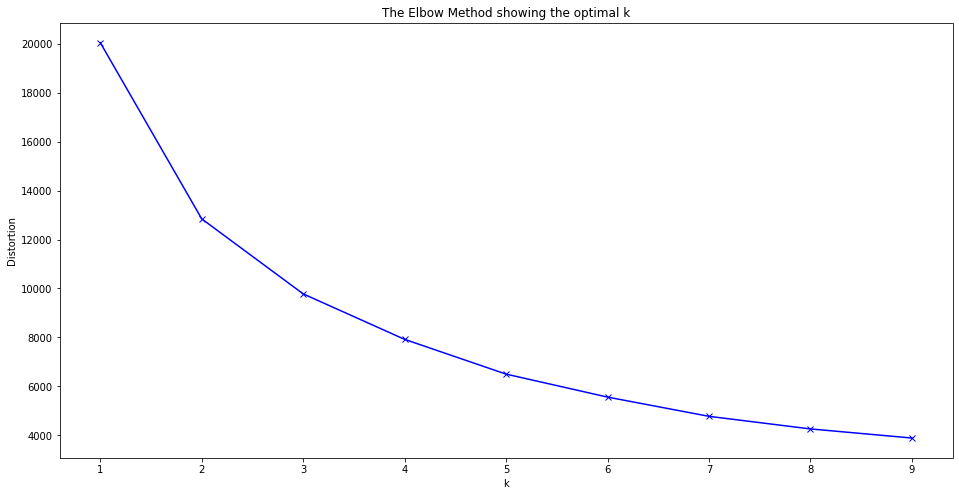

In [78]:
#Elbow Method to determine the best K value
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(ClusterData1s)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [79]:
#K-Means Clustering Algorithm
kmeans = KMeans(n_clusters=3, max_iter=500 , random_state = 100)
kmeans.fit(ClusterData1s)

KMeans(max_iter=500, n_clusters=3, random_state=100)

In [80]:
kmeans.labels_

array([1, 1, 1, ..., 0, 1, 1])

In [81]:
ClusterData1['Clustered'] = pd.Series(kmeans.labels_, index=ClusterData1.index)

In [82]:
ClusterData1['Clustered'].value_counts()

0    3640
1    2939
2     103
Name: Clustered, dtype: int64

In [83]:
ClusterData1

name    year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014.0       450000.0   145500.0   
1              Honda City 2017-2020 EXi  2006.0       158000.0   140000.0   
2          Skoda Rapid 1.5 TDI Ambition  2014.0       370000.0   120000.0   
3                Maruti Swift VXI BSIII  2007.0       130000.0   120000.0   
4             Hyundai i20 Sportz Diesel  2010.0       225000.0   127000.0   
...                                 ...     ...            ...        ...   
6677            Hyundai Santro Xing GLS  2008.0       120000.0   191000.0   
6678  Maruti Wagon R VXI BS IV with ABS  2013.0       260000.0    50000.0   
6679         Hyundai i20 Magna 1.4 CRDi  2014.0       475000.0    80000.0   
6680                  Hyundai i20 Magna  2013.0       320000.0   110000.0   
6681             Maruti Swift Dzire ZDi  2009.0       382000.0   120000.0   

      Clustered  
0             1  
1             1  
2             1  
3             1  
4             1  
...         ...  
6677          1  
6678          0  
6679          0  
6680          1  
6681          1  

[6682 rows x 5 columns]

In [84]:
one= ClusterData1[ClusterData1.Clustered == 2]
one

name    year  selling_price  \
74                 Jeep Compass 1.4 Limited Plus BSIV  2019.0      2100000.0   
137   Mercedes-Benz New C-Class C 220 CDI Elegance MT  2018.0      2950000.0   
155                            BMW X1 sDrive20i xLine  2016.0      2500000.0   
251                        Audi Q5 35TDI Premium Plus  2018.0      3975000.0   
253                                     Lexus ES 300h  2019.0      5150000.0   
...                                               ...     ...            ...   
6356                  Toyota Fortuner 2.8 4WD AT BSIV  2020.0      3200000.0   
6444                 Mercedes-Benz M-Class ML 350 CDI  2014.0      2575000.0   
6518                       Skoda Kodiaq 2.0 TDI Style  2018.0      2800000.0   
6526                    Volvo S90 D4 Inscription BSIV  2019.0      5500000.0   
6527               Ford Endeavour 2.2 Titanium AT 4X2  2016.0      2100000.0   

      km_driven  Clustered  
74       5000.0          2  
137     46000.0          2  
155     30000.0          2  
251     31800.0          2  
253     20000.0          2  
...         ...        ...  
6356     3000.0          2  
6444    70000.0          2  
6518    40000.0          2  
6526    17000.0          2  
6527    85000.0          2  

[103 rows x 5 columns]

## Visualizing the clusters using PCA method 

In [85]:
pcaplot = pd.DataFrame(np.array(ClusterData1))
pcaplot.columns = ClusterData1.columns

In [86]:
from sklearn.decomposition import PCA
pca2d = PCA(n_components=2)
pca3d = PCA(n_components=3)

In [87]:
pca2d = pd.DataFrame(pca2d.fit_transform(pcaplot.drop(["Clustered","name"], axis=1)))
pca3d = pd.DataFrame(pca3d.fit_transform(pcaplot.drop(["Clustered","name"], axis=1)))

In [88]:
pca2d.columns = ["pca_2d1", "pca_2d2"]

pca3d.columns = ["pca_3d1", "pca_3d2", "pca_3d3"]

In [89]:
pcaplot = pd.concat([pcaplot,pca2d,pca3d], axis=1, join='inner')

In [90]:
import plotly.express as px

In [91]:
#multi-dimensional plot - 2d
fig = px.scatter(pcaplot, x='pca_2d1', y='pca_2d2', color='Clustered')
fig.show()

In [92]:
#multi-dimensional plot - 3d
fig = px.scatter_3d(pcaplot, x='pca_3d1', y='pca_3d2', z='pca_3d3', color='Clustered')
fig.show()

               km_driven  selling_price
Clustered                              
0           46974.096703   6.202315e+05
1          106594.817625   3.036002e+05
2           35065.009709   3.497214e+06


<AxesSubplot:xlabel='Clustered'>

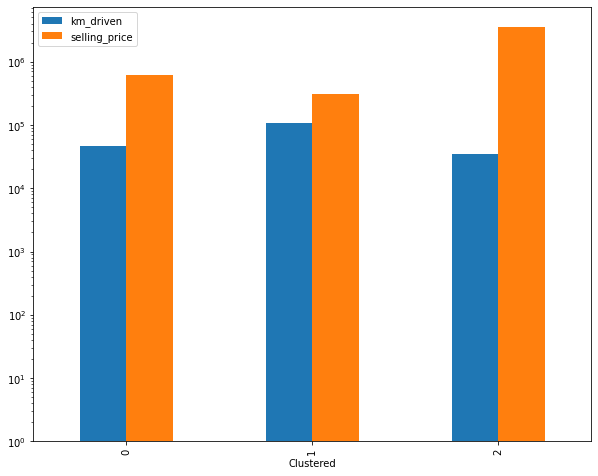

In [93]:
#Analysis
#Clustered Results Visualization
dfcluster = ClusterData1[['km_driven', 'selling_price','Clustered']].groupby('Clustered').mean()
print(dfcluster)
dfcluster.plot(kind='bar',log=True,figsize=(10,8))

(0.0, 500000.0)

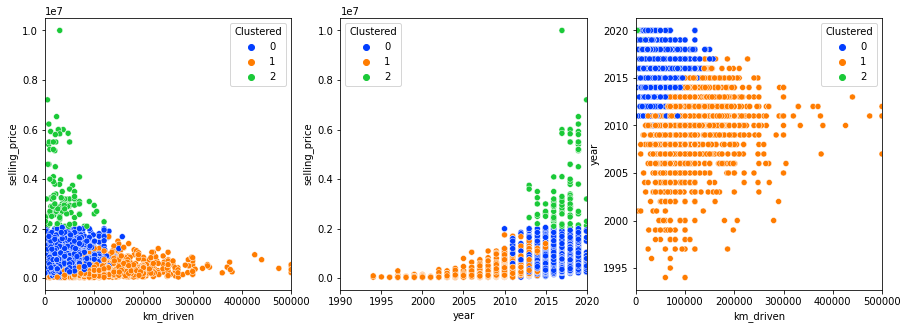

In [94]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='km_driven', y='selling_price', hue='Clustered',data=ClusterData1,palette="bright")
plt.xlim(0,500000)
plt.subplot(1, 3, 2)
sns.scatterplot(x='year', y='selling_price', hue='Clustered',data=ClusterData1,palette="bright")
plt.xlim(1990, 2020)
plt.subplot(1, 3, 3)
sns.scatterplot(x='km_driven', y='year', hue='Clustered',data=ClusterData1,palette="bright")
plt.xlim(0, 500000)

In [127]:

cars=pd.read_csv('finalcars_Dataset.csv')
#cars[["name","torque"]]
cars2=cars.loc[:,'year':'torque']
cars3=cars2
cars4=cars.loc[:,'year':'km_driven']

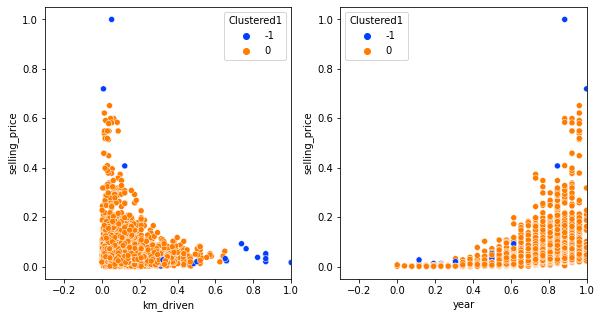

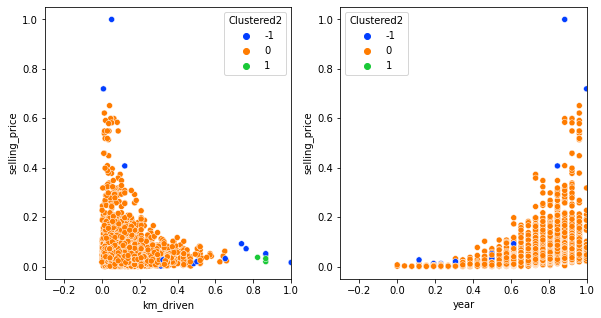

In [128]:

from sklearn.cluster import DBSCAN

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x = cars4.values #returns a numpy array
cars4 = pd.DataFrame(min_max_scaler.fit_transform(cars4), columns=cars4.columns, index=cars4.index)


model3 = DBSCAN(eps =0.08).fit(cars4 )
model4 = DBSCAN(eps = 0.07, min_samples = 4).fit(cars4) 


cars4['Clustered1'] = pd.Series(model3.labels_, index=cars4.index)
cars4['Clustered2'] = pd.Series(model4.labels_, index=cars4.index)
cars4
import matplotlib.pyplot as plt2
import matplotlib.pyplot as plt1 
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='km_driven', y='selling_price', hue='Clustered1' ,data=cars4,palette="bright")
plt.xlim(-0.3, 1)
plt.subplot(1, 3, 2)
sns.scatterplot(x='year', y='selling_price', hue='Clustered1' ,data=cars4,palette="bright")
plt.xlim(-0.3, 1) 
plt.show() 

plt1.figure(figsize=(15, 5))
plt1.subplot(1, 3, 1)
sns.scatterplot(x='km_driven', y='selling_price', hue='Clustered2' ,data=cars4,palette="bright")
plt1.xlim(-0.3, 1)
plt1.subplot(1, 3, 2)
sns.scatterplot(x='year', y='selling_price', hue='Clustered2' ,data=cars4,palette="bright")
plt1.xlim(-0.3, 1) 
plt1.show() 

# Comparing 2 clusters

In [97]:
cl11 = ClusterData1[ClusterData1.Clustered == 1 ]
cl22 =  ClusterData1[ClusterData1.Clustered == 2 ] 

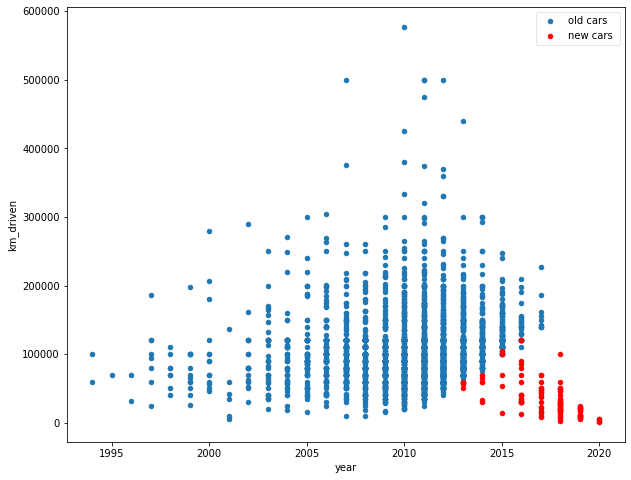

In [98]:
#comparing 2 clusters 
ax1 = cl11.plot(kind = 'scatter',x='year', y='km_driven',figsize=(10,8))
cl22.plot(ax=ax1,kind = 'scatter', color = 'red', x='year', y='km_driven')
legends=['old cars','new cars ']
plt.legend(legends,loc='best', fancybox=True, framealpha=0.5)
plt.show()

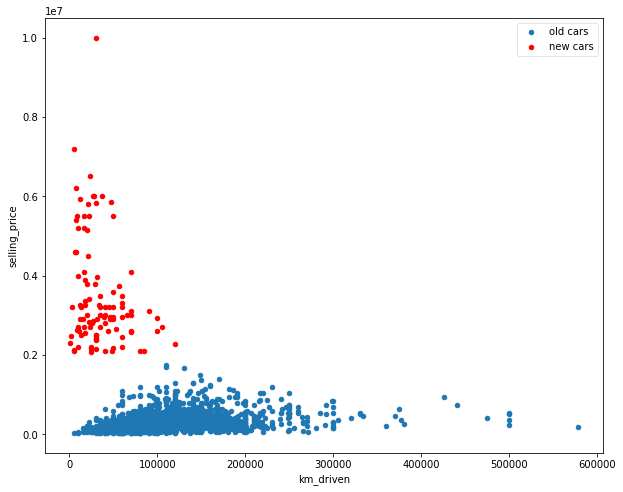

In [99]:

ax1 = cl11.plot(kind = 'scatter',x='km_driven', y='selling_price',figsize=(10,8))
cl22.plot(ax=ax1,kind = 'scatter', color = 'red', x='km_driven', y='selling_price')
legends=['old cars','new cars']
plt.legend(legends,loc='best', fancybox=True, framealpha=0.5)
plt.show()

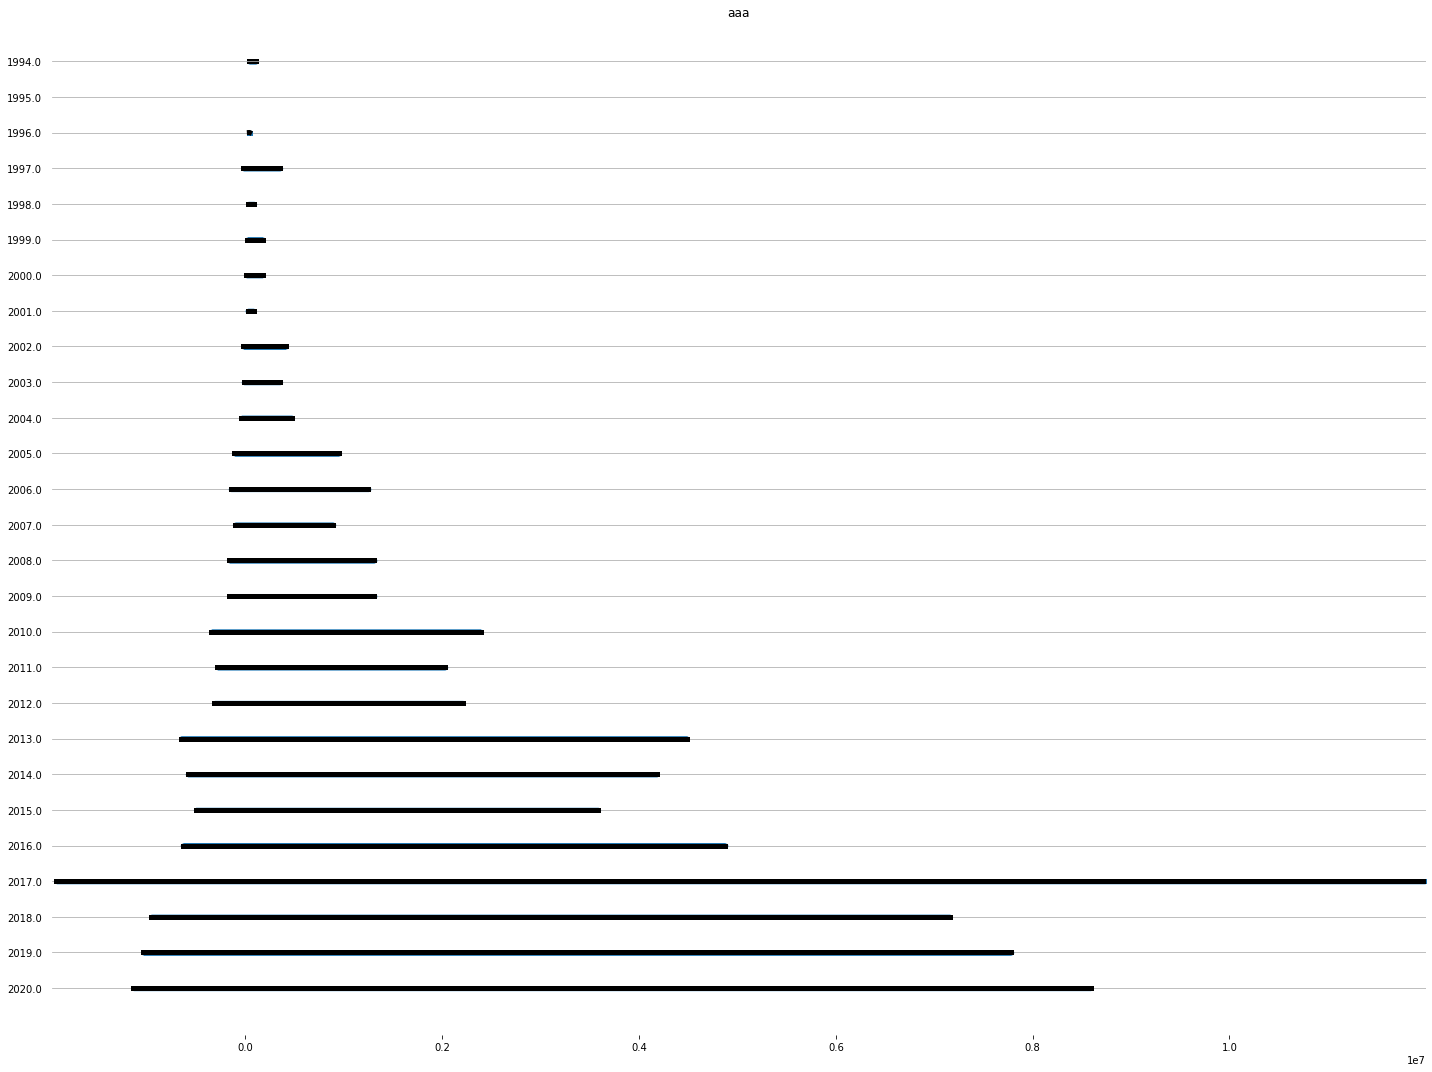

In [100]:
#joyplot to show the selling price increases as the car model year gets newer
import joypy
import matplotlib.cm as cm
axes = joypy.joyplot(ClusterData1, by="year", column='selling_price', range_style='own', 
                          grid="y", linewidth=5, legend=False, figsize=(20,15),
                          title="aaa")

From the Analysis of clusters above we can see that the cars which are new model and km-driven is very less have the more selling price which is shown in the cluster 2.
The cars which are pretty old by year and obviously the km-driven will be high, hence the selling price drops as the car gets older and increasing km-driven as shown in cluster 0.

# K - Means Clustering 2

In [101]:
ClusterData2 = carsf2[['name','fuel','mileage','max_power','engine','torque','engine_rpm']]

In [102]:
ClusterData2

name  fuel  mileage  max_power  engine  \
0                Maruti Swift Dzire VDI     1    23.40      74.00  1248.0   
1              Honda City 2017-2020 EXi     3    17.70      78.00  1497.0   
2          Skoda Rapid 1.5 TDI Ambition     1    21.14     103.52  1498.0   
3                Maruti Swift VXI BSIII     3    16.10      88.20  1298.0   
4             Hyundai i20 Sportz Diesel     1    23.00      90.00  1396.0   
...                                 ...   ...      ...        ...     ...   
6677            Hyundai Santro Xing GLS     3    17.92      62.10  1086.0   
6678  Maruti Wagon R VXI BS IV with ABS     3    18.90      67.10   998.0   
6679         Hyundai i20 Magna 1.4 CRDi     1    22.54      88.73  1396.0   
6680                  Hyundai i20 Magna     3    18.50      82.85  1197.0   
6681             Maruti Swift Dzire ZDi     1    19.30      73.90  1248.0   

          torque  engine_rpm  
0     190.000000      2000.0  
1     190.000000      2000.0  
2     250.000000      2500.0  
3     250.000000      2500.0  
4     219.668960      2750.0  
...          ...         ...  
6677   55.897905      2500.0  
6678  124.544455      2700.0  
6679  146.119085      3000.0  
6680  235.359600      2750.0  
6681  250.000000      3000.0  

[6682 rows x 7 columns]

In [103]:
ClusterData2.loc[ClusterData2['engine_rpm'] > 20000, 'engine_rpm'] = 4000

In [104]:

ClusterData2s = ClusterData2.drop(['name','mileage','fuel'], axis=1)
sc_x = StandardScaler()
ClusterData2s = sc_x.fit_transform(ClusterData2s)
ClusterData2s

array([[-0.43414866, -0.3717196 ,  0.15668297, -1.19756338],
       [-0.30795829,  0.13300655,  0.15668297, -1.19756338],
       [ 0.49713625,  0.13503356,  0.82738842, -0.64660689],
       ...,
       [ 0.03054737, -0.07172173, -0.33383652, -0.0956504 ],
       [-0.15495247, -0.47509724,  0.66373182, -0.37112865],
       [-0.43730342, -0.3717196 ,  0.82738842, -0.0956504 ]])

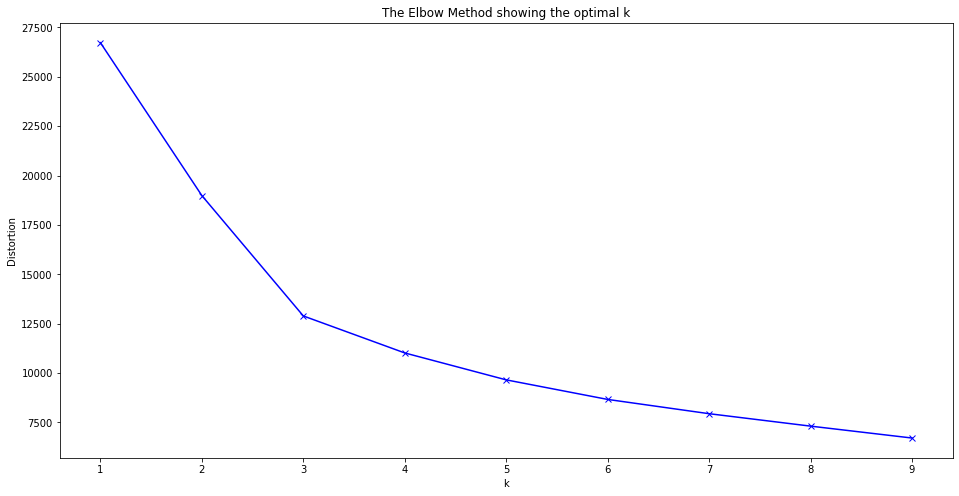

In [105]:
#Elbow Method to determine the best K value
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(ClusterData2s)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [106]:
#K-Means Clustering Algorithm
kmeans1 = KMeans(n_clusters=3, max_iter=500 , random_state = 100)
kmeans1.fit(ClusterData2s)

KMeans(max_iter=500, n_clusters=3, random_state=100)

In [107]:
ClusterData2['Clustered'] = pd.Series(kmeans1.labels_, index=ClusterData2.index)

In [108]:
ClusterData2['Clustered'].value_counts()

1    2719
0    2711
2    1252
Name: Clustered, dtype: int64

In [109]:
ClusterData2

name  fuel  mileage  max_power  engine  \
0                Maruti Swift Dzire VDI     1    23.40      74.00  1248.0   
1              Honda City 2017-2020 EXi     3    17.70      78.00  1497.0   
2          Skoda Rapid 1.5 TDI Ambition     1    21.14     103.52  1498.0   
3                Maruti Swift VXI BSIII     3    16.10      88.20  1298.0   
4             Hyundai i20 Sportz Diesel     1    23.00      90.00  1396.0   
...                                 ...   ...      ...        ...     ...   
6677            Hyundai Santro Xing GLS     3    17.92      62.10  1086.0   
6678  Maruti Wagon R VXI BS IV with ABS     3    18.90      67.10   998.0   
6679         Hyundai i20 Magna 1.4 CRDi     1    22.54      88.73  1396.0   
6680                  Hyundai i20 Magna     3    18.50      82.85  1197.0   
6681             Maruti Swift Dzire ZDi     1    19.30      73.90  1248.0   

          torque  engine_rpm  Clustered  
0     190.000000      2000.0          1  
1     190.000000      2000.0          1  
2     250.000000      2500.0          1  
3     250.000000      2500.0          1  
4     219.668960      2750.0          1  
...          ...         ...        ...  
6677   55.897905      2500.0          0  
6678  124.544455      2700.0          0  
6679  146.119085      3000.0          0  
6680  235.359600      2750.0          1  
6681  250.000000      3000.0          1  

[6682 rows x 8 columns]

In [110]:
diesel= ClusterData2[ClusterData2.Clustered == 2 ]
diesel

name  fuel  mileage  max_power  \
48                                     Tata Sumo GX     1    14.40     120.00   
70                     Tata Safari DICOR 2.2 LX 4x2     1    13.93     138.03   
79    Chevrolet Tavera Neo LS B3 - 7(C) seats BSIII     1    14.80      80.00   
86                           Toyota Fortuner 4x4 MT     1    12.55     168.50   
88      Toyota Innova 2.5 G (Diesel) 7 Seater BS IV     1    12.99     100.00   
...                                             ...   ...      ...        ...   
6643                           Chevrolet Captiva LT     1    11.50     147.90   
6645                             Chevrolet Cruze LT     1    18.30     147.90   
6659                         Mahindra XUV500 W8 2WD     1    15.10     140.00   
6662                  Hyundai Verna 1.6 SX CRDi (O)     1    22.32     126.32   
6671   Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV     1    12.80     102.00   

      engine      torque  engine_rpm  Clustered  
48    2179.0   84.000000      3500.0          2  
70    2179.0  250.000000      2500.0          2  
79    2499.0  200.000000      1750.0          2  
86    2982.0  200.000000      4000.0          2  
88    2494.0  200.000000      1750.0          2  
...      ...         ...         ...        ...  
6643  1991.0  350.097405      3000.0          2  
6645  1991.0  132.389775      4800.0          2  
6659  2179.0  146.119085      3000.0          2  
6662  1582.0  240.262925      4500.0          2  
6671  2494.0  132.389775      2500.0          2  

[1252 rows x 8 columns]

# PCA to Visualize clusters

In [111]:

pcaplot2 = pd.DataFrame(np.array(ClusterData2))
pcaplot2.columns = ClusterData2.columns

In [112]:
from sklearn.decomposition import PCA
pca2d_2 = PCA(n_components=2)
pca3d_2 = PCA(n_components=3)

In [113]:
pca2d_2 = pd.DataFrame(pca2d_2.fit_transform(pcaplot2.drop(["Clustered","name",'mileage','fuel'], axis=1)))
pca3d_2 = pd.DataFrame(pca3d_2.fit_transform(pcaplot2.drop(["Clustered","name",'mileage','fuel'], axis=1)))

In [114]:
pca2d_2.columns = ["pca2_2d1", "pca2_2d2"]

pca3d_2.columns = ["pca3_3d1", "pca3_3d2", "pca3_3d3"]

In [115]:
pcaplot = pd.concat([pcaplot,pca2d,pca3d], axis=1, join='inner')
pcaplot2 = pd.concat([pcaplot2,pca2d_2,pca3d_2], axis=1, join='inner')

In [116]:
#multi-dimensional plot - 3d
fig1 = px.scatter_3d(pcaplot2, x='pca3_3d1', y='pca3_3d2', z='pca3_3d3', color='Clustered')
fig1.show()

In [117]:
#Multi-dimensional - 2d
fig = px.scatter(pcaplot2, x='pca2_2d1', y='pca2_2d2', color='Clustered')
fig.show()

In [118]:
#3d scatter plot to visualize clusters for the below features
fig = px.scatter_3d(ClusterData2, x='torque', y='max_power', z='engine_rpm', color='Clustered',opacity=0.3,  width=1000, height=600)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)


<AxesSubplot:xlabel='torque', ylabel='fuel'>

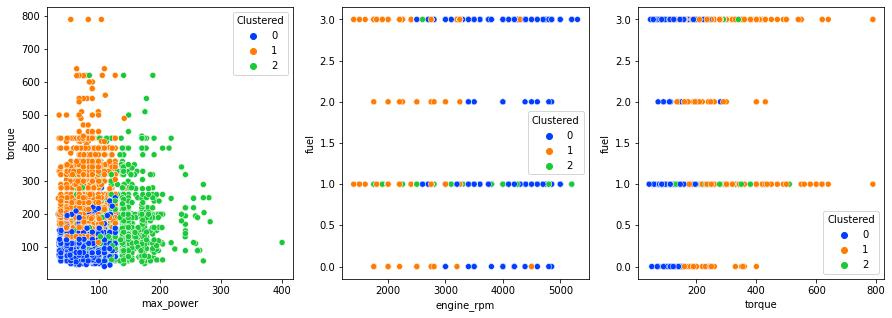

In [119]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='max_power', y='torque', hue='Clustered',data=ClusterData2,palette="bright")
#plt.xlim(0,500000)
plt.subplot(1, 3, 2)
sns.scatterplot(x='engine_rpm', y='fuel', hue='Clustered',data=ClusterData2,palette="bright")
#plt.xlim(1990, 2020)
plt.subplot(1, 3, 3)
sns.scatterplot(x='torque', y='fuel', hue='Clustered',data=ClusterData2,palette="bright")
#plt.xlim(0, 500000)

# Comparision of 2 clusters

In [120]:
cl1 = ClusterData2[ClusterData2.Clustered == 0 ]
cl2 =  ClusterData2[ClusterData2.Clustered == 2 ] 

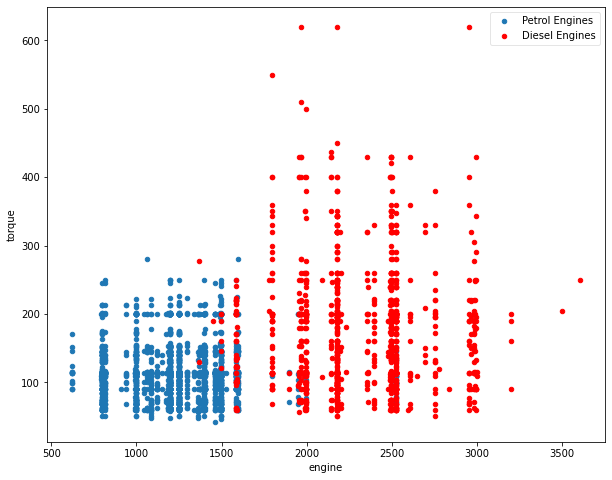

In [121]:

ax = cl1.plot(kind = 'scatter',x='engine', y='torque',figsize=(10,8))
cl2.plot(ax=ax,kind = 'scatter', color = 'red', x='engine', y='torque')
legends=['Petrol Engines','Diesel Engines']
plt.legend(legends,loc='best', fancybox=True, framealpha=0.5)
plt.show()

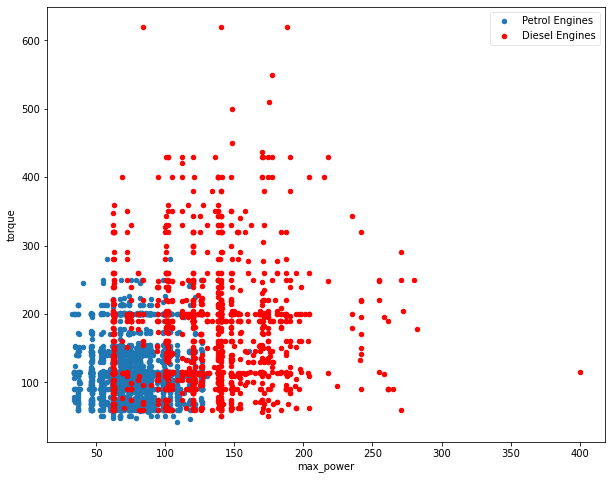

In [122]:
#Plotting the differences between the Underdeveloped and Developed countries according to the child_mort and gdpp
ax = cl1.plot(kind = 'scatter',x='max_power', y='torque',figsize=(10,8))
cl2.plot(ax=ax,kind = 'scatter', color = 'red', x='max_power', y='torque')
legends=['Petrol Engines','Diesel Engines']
plt.legend(legends,loc='best', fancybox=True, framealpha=0.5)
plt.show()

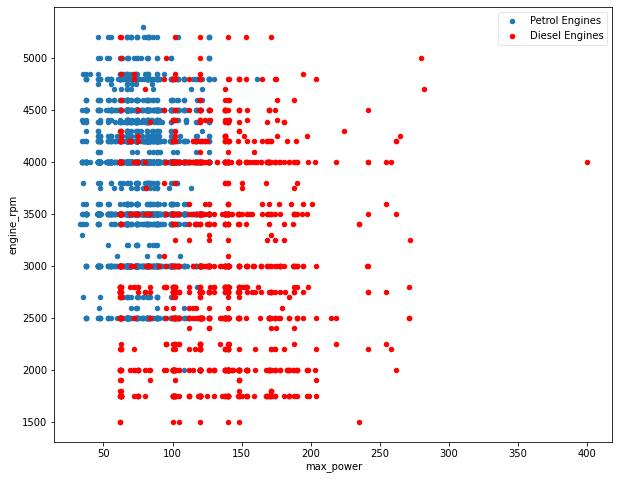

In [123]:

ax = cl1.plot(kind = 'scatter',x='max_power', y='engine_rpm',figsize=(10,8))
cl2.plot(ax=ax,kind = 'scatter', color = 'red', x='max_power', y='engine_rpm')
legends=['Petrol Engines','Diesel Engines']
plt.legend(legends,loc='best', fancybox=True, framealpha=0.5)
plt.show()

From the above clustering, we can analyze that Petrol engines(cluster 0) has higher rpm which means more fuel burnt and low torque. Diesel engines (Cluster 2) has the higher torque with low rpm to give more mileage. Concluding the clusters, Diesel engines are better than petrol is that the power in diesel is high and the heat capacity is also high. So, it runs on less rpm and produce high torque to give a better mileage and horsepower. 